First of all, we install the dependencies and we import the libraries.

In [1]:
!pip install ydata-profiling recordlinkage > /dev/null 2>&1

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import recordlinkage
import re
%matplotlib inline

**DATA EXPLORATION AND DATA PROFILING**

We load the dataset from the repository and we take a first look of the data.

In [3]:
link = 'https://raw.githubusercontent.com/antilupovolante/DataInformationQuality2425/main/Comune-di-Milano-Strutture-ricettive-alberghiere.csv'

In [4]:
DATA = pd.read_csv(link, sep=';', encoding='unicode_escape')
DATA

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo
1,codvia 0000 num.024 ; (),NaN,NaN,NaN,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo
3,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26.0,2129.0,3.0,25.0,NaN,3,hotel buenos aires,NaN,NaN,39.0,NaN,Albergo
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6.0,2121.0,3.0,13.0,16,1,hotel kennedy,1.0,6,23.0,23,Albergo
447,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9.0,2121.0,3.0,50.0,3;6;9;9;9,4,st. george hotel,NaN,A;1;2;3;4,99.0,5;16;26;26;26,Albergo
448,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30.0,2107.0,2.0,15.0,NaN,2,hotel casa mia,NaN,NaN,25.0,NaN,Albergo
449,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1.0,1170.0,9.0,32.0,NaN,4,casa albergo residence zara lagosta,NaN,NaN,64.0,NaN,Residence


We use the ydata_profiling library to get a comprehensive data profiling report for our dataset. The report contains information about correlation between columns, various statistics of the distribution of the values, statistics about the missing values, etc.

In [5]:
PROFILE = ProfileReport(DATA, title="Profiling Report")

In [7]:
# to see the profile report (it takes time to generate) uncomment the following line
PROFILE

Output hidden; open in https://colab.research.google.com to view.

In [8]:
DATA.duplicated().any()

False

DATA.duplicated().any() returned False, so there are no exact duplicates in the dataset. However, there could still be duplicates that are more "hidden".

We decided to use FD_MINE to perform functional dependency discovery.

In [9]:
!git clone https://github.com/antilupovolante/DataInformationQuality2425.git
import os
os.chdir('/content/DataInformationQuality2425')
from DataInformationQuality2425 import fdtool

Cloning into 'DataInformationQuality2425'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 39.73 KiB | 13.24 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [10]:
# we first tried to use fd_mine with all attributes (excluding 'Insegna') but
# it took like 15 minutes to complete and results were not particularly different
# from the ones we get later by excluding some other attributes.
# if you really want to hurt yourself, uncomment the following lines to see the results

# DATA_COPY = DATA.copy()
# DATA_COPY.drop(columns=['Insegna'], inplace=True)
# fdtool.main(DATA_COPY)

Since using all attributes (excluding 'Insegna') took forever to complete the execution, we decided to ignore also 'Civico' and 'Tipo via' as, in our opinion, they would not matter that much.

In [11]:
DATA_COPY = DATA.copy()
DATA_COPY.drop(columns=['Insegna'], inplace=True)
DATA_COPY.drop(columns=['Civico'], inplace=True)
DATA_COPY.drop(columns=['Tipo via'], inplace=True)
fdtool.main(DATA_COPY)

Functional Dependencies: 
{Ubicazione} -> {Codice via}
{Ubicazione} -> {Descrizione via}
{Ubicazione} -> {ZD}
{Codice via, Camere piano} -> {Descrizione via}
{Camere piano, Ubicazione} -> {Piano piano}
{Camere piano, Ubicazione} -> {Camere}
{Camere piano, Ubicazione} -> {Piani totali}
{Camere piano, Ubicazione} -> {Posti letto per piano}
{Codice via, Piano piano} -> {Descrizione via}
{Camere piano, Descrizione via} -> {Codice via}
{Piano piano, Descrizione via} -> {Codice via}
{Codice via, Categoria} -> {Descrizione via}
{Codice via, Posti letto} -> {Descrizione via}
{Codice via, Posti letto} -> {ZD}
{Camere piano, Posti letto} -> {Piano piano}
{Camere piano, Posti letto} -> {Posti letto per piano}
{Ubicazione, Posti letto} -> {Piano piano}
{Ubicazione, Posti letto} -> {Categoria}
{Ubicazione, Posti letto} -> {Piani totali}
{Descrizione via, Posti letto} -> {Codice via}
{Descrizione via, Posti letto} -> {ZD}
{Codice via, ZD} -> {Descrizione via}
{Codice via, Camere} -> {Descrizione via

We inspected the resulting functional dependencies and, apart of the obvious ones (e.g., 'Ubicazione', 'Descrizione via', and 'ZD' being related, or 'Camere' and 'Camere piano'), we think FD_MINE did not extract any other meaningful functional dependencies.

**DATA QUALITY ASSESSMENT**

Let's compute the completeness measurement of the dataset


In [12]:
not_null = DATA.count().sum()
not_null

5922

In [13]:
nulls = DATA.isnull().sum()
nulls

,0
Ubicazione,0
Tipo via,14
Descrizione via,14
Civico,30
Codice via,14
ZD,14
Camere,1
Camere piano,106
Categoria,7
Insegna,10


In [14]:
total_cells = DATA.shape[0]*DATA.shape[1]
total_cells

6765

In [15]:
completeness = (not_null/total_cells)
COMPLETENESS = '{0:.1f}%'.format(completeness*100)
COMPLETENESS

'87.5%'

Now we compute accuracy with respect to the 'Categoria' field.

In [16]:
possible_values = ['1', '2', '3', '4', '5', '5 STELLE LUSSO']
CORRECT = DATA['Categoria'].isin(possible_values)
CORRECT_CATEGORIA = np.sum(CORRECT)
NOT_NULL_CATEGORIA = DATA['Categoria'].count()
ACCURACY_CATEGORIA = CORRECT_CATEGORIA/NOT_NULL_CATEGORIA
ACCURACY_CATEGORIA = '{0:.1f}%'.format(ACCURACY_CATEGORIA*100)
print(ACCURACY_CATEGORIA)

98.6%


Let's now compute consistency: first, we start with the 'Piani totali' and 'Piano piano' columns.

In [17]:
def visualize_floors(DATA, display=True):
  # First, let's make a copy of the dataset to avoid making a mess
  DATA_TEMP = DATA.copy()

  # We calculate the number of floors in the 'Piano piano' field
  DATA_TEMP['Piano piano_bis'] = DATA_TEMP['Piano piano'].apply(
      lambda x: len(x.split(";")) if pd.notna(x) else 0
  )

  # We fill the NaN values with 0
  DATA_TEMP['Piani totali'] = DATA_TEMP['Piani totali'].fillna(0)
  DATA_TEMP['Piano piano_bis'] = DATA_TEMP['Piano piano_bis'].fillna(0)

  # We calculate the difference between the two columns
  DATA_TEMP['Difference'] = DATA_TEMP['Piani totali'] - DATA_TEMP['Piano piano_bis']
  mismatch = DATA_TEMP[DATA_TEMP['Difference'] != 0]

  total_length = DATA.shape[0]
  zero_diff_count = (DATA_TEMP['Difference'] == 0).sum()
  consistency = (zero_diff_count/total_length)
  CONSISTENCY = '{0:.1f}%'.format(consistency*100)
  print("Consistency: ", CONSISTENCY)

  if display == True:
    # We draw a scatter plot to visualize discrepancies
    plt.figure(figsize=(10, 6))
    plt.scatter(DATA_TEMP.index, DATA_TEMP['Piani totali'], label='Piani totali', alpha=0.7, color='blue')
    plt.scatter(DATA.index, DATA_TEMP['Piano piano_bis'], label='Piano piano', alpha=0.7, color='orange')
    plt.title("Comparison of 'Piani totali' and 'Piano piano'")
    plt.xlabel("Index")
    plt.ylabel("Number of Floors")
    plt.legend()
    plt.grid()

    # And we highlight the rows where the values differ (and to see how they differ)
    plt.figure(figsize=(10, 6))
    plt.bar(mismatch.index, mismatch['Difference'], color='red', label='Difference (Piani totali - Piano piano)')
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Differences between 'Piani totali' and 'Piano piano'")
    plt.xlabel("Index")
    plt.ylabel("Difference")
    plt.legend()
    plt.grid()

    plt.show()
  return mismatch

# to see the graphs set the display parameter to true
visualize_floors(DATA, display=False);

Consistency:  86.3%


Let's now move to the 'Camere' and 'Camere piano' columns.

In [18]:
def visualize_rooms(DATA, display=True):
  # First, let's make a copy of the dataset to avoid making a mess
  DATA_TEMP = DATA.copy()

  # We compute the sum of the 'Camere piano' value
  DATA_TEMP['Camere piano totale'] = DATA_TEMP['Camere piano'].apply(
      lambda x: sum(int(num) for num in str(x).split(';') if num.isdigit()) if pd.notna(x) else 0
  )

  # We calculate the difference between the two columns
  DATA_TEMP['Difference'] = DATA_TEMP['Camere'] - DATA_TEMP['Camere piano totale']
  mismatch = DATA_TEMP[DATA_TEMP['Difference'] != 0]

  total_length = DATA.shape[0]
  zero_diff_count = (DATA_TEMP['Difference'] == 0).sum()
  consistency = (zero_diff_count/total_length)
  CONSISTENCY = '{0:.1f}%'.format(consistency*100)
  print("Consistency: ", CONSISTENCY)

  if display == True:
    # We draw a scatter plot to visualize discrepancies
    plt.figure(figsize=(10, 6))
    plt.scatter(DATA_TEMP.index, DATA_TEMP['Camere'], label='Camere', alpha=0.7, color='blue')
    plt.scatter(DATA.index, DATA_TEMP['Camere piano totale'], label='Camere piano', alpha=0.7, color='orange')
    plt.title("Comparison of 'Camere' and 'Camere piano'")
    plt.xlabel("Index")
    plt.ylabel("Number of Rooms")
    plt.legend()
    plt.grid()

    # And we highlight the rows where the values differ (and to see how they differ)
    plt.figure(figsize=(10, 6))
    plt.bar(mismatch.index, mismatch['Difference'], color='red', label='Difference (Camere - Camere piano)')
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Differences between 'Camere' and 'Camere piano'")
    plt.xlabel("Index")
    plt.ylabel("Difference")
    plt.legend()
    plt.grid()

  plt.show()
  return mismatch

visualize_rooms(DATA, display=False);

Consistency:  23.9%


Finally, let's check consider 'Posti letto' and 'Posti letto per piano'.

In [19]:
def visualize_beds(DATA, display=True):
  # First, let's make a copy of the dataset to avoid making a mess
  DATA_TEMP = DATA.copy()

  # We compute the sum of the 'Posti letto per piano' value
  DATA_TEMP['Posti letto per piano totale'] = DATA_TEMP['Posti letto per piano'].apply(
      lambda x: sum(int(num) for num in str(x).split(';') if num.isdigit()) if pd.notna(x) else 0
  )

  # We calculate the difference between the two columns
  DATA_TEMP['Difference'] = DATA_TEMP['Posti letto'] - DATA_TEMP['Posti letto per piano totale']
  mismatch = DATA_TEMP[DATA_TEMP['Difference'] != 0]

  total_length = DATA.shape[0]
  zero_diff_count = (DATA_TEMP['Difference'] == 0).sum()
  consistency = (zero_diff_count/total_length)
  CONSISTENCY = '{0:.1f}%'.format(consistency*100)
  print("Consistency: ", CONSISTENCY)

  if display == True:
    # We draw a scatter plot to visualize discrepancies
    plt.figure(figsize=(10, 6))
    plt.scatter(DATA_TEMP.index, DATA_TEMP['Posti letto'], label='Posti letto', alpha=0.7, color='blue')
    plt.scatter(DATA.index, DATA_TEMP['Posti letto per piano totale'], label='Posti letto per piano', alpha=0.7, color='orange')
    plt.title("Comparison of 'Posti letto' and 'Posti letto per piano'")
    plt.xlabel("Index")
    plt.ylabel("Number of Beds")
    plt.legend()
    plt.grid()

    # And we highlight the rows where the values differ (and to see how they differ)
    plt.figure(figsize=(10, 6))
    plt.bar(mismatch.index, mismatch['Difference'], color='red', label='Difference (Posti letto - Posti letto per piano)')
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Differences between 'Posti letto' and 'Posti letto per piano'")
    plt.xlabel("Index")
    plt.ylabel("Difference")
    plt.legend()
    plt.grid()

  plt.show()
  return mismatch

visualize_beds(DATA, display=False);

Consistency:  20.2%


**DATA STANDARDIZATION**

The dataset does not have any field with a measurement unit, so we do not need to standardize any column in that sense.

Let's start by standardizing the 'Piano piano' column: values should be in the format X;Y;Z where the ";"-separated values are numbers.

First, we translate "T" ("Terra") into 0.

In [20]:
DATA['Piano piano'] = DATA['Piano piano'].str.replace('T', '0')

Then, we translate any other letter with the maximum of the numbers present in the string + 1. We also make sure that a string like ";;" gets translated to "0;1;2".

In [21]:
def replace_letters_with_numbers(input_str):
    if pd.isna(input_str):
        return np.nan  # To handle NaN values
    if input_str.startswith(";"):
        input_str = "0" + input_str
    elements = input_str.split(";")  # We split the string by ";"
    numeric_values = [int(x) for x in elements if x.isdigit()]
    # We determine the max number (default to 0 if there are no numbers)
    max_num = max(numeric_values, default=0)
    new_elements = []  # This array to store the updated elements
    next_num = max_num + 1  # This is the number that will replace the letter

    for elem in elements:
        if elem.isalpha():  # If it's a letter, we replace it with the next number
            new_elements.append(str(next_num))
            next_num += 1
        elif elem == "":  # We replace empty fields with incremental numbers
            new_elements.append(str(next_num))
            next_num += 1
        else:  # Otherwise, we keep the element as it is
            new_elements.append(elem)

    return ";".join(new_elements)

DATA['Piano piano'] = DATA['Piano piano'].apply(replace_letters_with_numbers)
DATA

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo
1,codvia 0000 num.024 ; (),NaN,NaN,NaN,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo
3,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26.0,2129.0,3.0,25.0,NaN,3,hotel buenos aires,NaN,NaN,39.0,NaN,Albergo
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6.0,2121.0,3.0,13.0,16,1,hotel kennedy,1.0,6,23.0,23,Albergo
447,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9.0,2121.0,3.0,50.0,3;6;9;9;9,4,st. george hotel,NaN,5;1;2;3;4,99.0,5;16;26;26;26,Albergo
448,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30.0,2107.0,2.0,15.0,NaN,2,hotel casa mia,NaN,NaN,25.0,NaN,Albergo
449,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1.0,1170.0,9.0,32.0,NaN,4,casa albergo residence zara lagosta,NaN,NaN,64.0,NaN,Residence


Now, let's move to the 'Categoria' column.

The 'Categoria' column is categorical, with values that should range from 1 (1 star) to 5L (5 star luxury): let's now deal with this column.

In [22]:
DATA['Categoria'].value_counts()

,count
Categoria,
4,147
3,135
1,83
2,64
5,7
l,3
I,3
5 STELLE LUSSO,2


In [23]:
DATA.loc[DATA['Categoria'] == 'l', 'Categoria'] = '5L'
DATA.loc[DATA['Categoria'] == '5 STELLE LUSSO', 'Categoria'] = '5L'
DATA.loc[DATA['Categoria'] == 'I', 'Categoria'] = '5L'
DATA['Categoria'].value_counts()

,count
Categoria,
4,147
3,135
1,83
2,64
5L,8
5,7


First of all, there is a typo in the name of the 'Tipo attività struture extra': it should be 'Tipo attività strutture extra'.

Then, the values in the 'Tipo attività strutture extra' should be either 'Albergo' or 'Residence'.

In [24]:
DATA['Tipo attività strutture extra']  = DATA['Tipo attività struture extra']
DATA.drop(columns=['Tipo attività struture extra'], inplace=True)

In [25]:
DATA['Tipo attività strutture extra'].value_counts()

,count
Tipo attività strutture extra,
Albergo,386
Residence,51
albergo,4


In [26]:
DATA.loc[DATA['Tipo attività strutture extra'] == 'albergo', 'Tipo attività strutture extra'] = 'Albergo'
DATA['Tipo attività strutture extra'].value_counts()

,count
Tipo attività strutture extra,
Albergo,390
Residence,51


**DATA CLEANING: HANDLING OF MISSING VALUES AND ERROR CORRECTION**

First we want to detect the rows that have at least 80% of the values missing: we could probably drop them since it is very unlikely that the provide useful information.

In [27]:
useless_rows = []
for i in range(DATA.shape[0]):
  if DATA.iloc[i].isnull().sum() / DATA.shape[1] >= 0.8:
    useless_rows.append(i)
for row in useless_rows:
  print(DATA.loc[row])
DATA.loc[useless_rows]
DATA = DATA.drop(useless_rows)
DATA = DATA.reset_index(drop=True)

Ubicazione                       VIA SANTA RADEGONDA N. 14 (z.d. 1)
Tipo via                                                        NaN
Descrizione via                                                 NaN
Civico                                                          NaN
Codice via                                                      NaN
ZD                                                              NaN
Camere                                                          NaN
Camere piano                                                    NaN
Categoria                                                       NaN
Insegna                                                         NaN
Piani totali                                                    NaN
Piano piano                                                     NaN
Posti letto                                                     NaN
Posti letto per piano                                           NaN
Tipo attività strutture extra                   

From the previous code we obtained that only one row has more than 80% of its values that are missing. Actually, from the 'Ubicazione' column we can compute the values for the 'Tipo via', 'Descrizione via', 'Civico', and 'ZD' columns, so the percentage would go down to 66%: however, it would still be a pretty useless row in our opinion and dropping it could still be a good option.

There are NaN values in the 'Categoria' column: we should put a 'Not specified' value there.

In [28]:
DATA.loc[DATA['Categoria'].isna(), 'Categoria'] = 'Not specified'
DATA['Categoria'].value_counts()

,count
Categoria,
4,147
3,135
1,83
2,64
5L,8
5,7
Not specified,6


We also replace NaN values in the 'Tipo attività strutture extra' with 'Not specified'.

In [29]:
DATA.loc[DATA['Tipo attività strutture extra'].isna(), 'Tipo attività strutture extra'] = 'Not specified'
DATA['Tipo attività strutture extra'].value_counts()

,count
Tipo attività strutture extra,
Albergo,390
Residence,51
Not specified,9


We also replace the NaN in the 'Insegna columns' with 'Not specified'.

In [30]:
DATA['Insegna'] = DATA['Insegna'].fillna('Not specified')
DATA['Insegna'].value_counts()

,count
Insegna,
Not specified,9
radisson blu hotel milan,2
leonardo da vinci,2
hotel minerva,2
ambrosiana,2
...,...
una hotel scandinavia,1
hotel cavour,1
hotel san guido,1


Now We will handle the missing values in the columns 'Tipo via', 'Descrizione via', 'Civico', and 'ZD' using the information contained in the 'Ubicazione' column.

First of all, we list the possible values in the 'Tipo via' column (excluding the null value).

In [31]:
address_type = DATA['Tipo via'].unique()
address_type = address_type[~pd.isnull(address_type)].tolist()
address_type

['ALZ', 'CSO', 'GLL', 'LGO', 'PLE', 'PZA', 'VIA', 'VLE']

Then we fill the NaN values in the 'Tipo via' column with the first part of the 'Ubicazione' column (if it belongs to the value set computed above).

In [32]:
indexes = DATA.index[(DATA['Ubicazione'].str.split(" ").str[0].isin(address_type)) & (DATA['Tipo via'].isnull())].tolist()
for index in indexes:
  DATA.loc[index, 'Tipo via'] = DATA.loc[index, 'Ubicazione'].split(" ")[0]
DATA['Tipo via'].head()

,Tipo via
0,ALZ
1,NaN
2,CSO
3,CSO
4,CSO


Now we use a regular expression to extract the ZD values from the 'Ubicazione' column and we use them to fill the null values in the 'ZD' column.

In [33]:
zds = DATA['Ubicazione'].str.extract(r'\(z\.d\. (\d+)\)')
DATA.loc[DATA['ZD'].isna(), 'ZD'] = zds[0]
DATA['ZD'].head()

,ZD
0,6.0
1,NaN
2,3.0
3,3.0
4,3.0


Using the same approach as before, we recompute the 'Descrizione via' values from the 'Ubicazione' column.

In [34]:
DATA['Descrizione via'] = DATA['Ubicazione'].str.extract(r'^[A-Z]+\s+(.+?)\s+(?:N\.|num|Int)', expand=True)
DATA['Descrizione via'].head()

,Descrizione via
0,NAVIGLIO GRANDE
1,NaN
2,BUENOS AIRES
3,BUENOS AIRES
4,BUENOS AIRES


Again using a regular expression, we recompute the 'Civico' column from the 'Ubicazione' column. We also cast it to int, since having float house numbers does not make sense.

In [35]:
DATA['Civico'] = DATA['Ubicazione'].str.extract(r'(?:N\.|num.|Int.)\s*(\d+)', expand=True)
DATA['Civico'] = DATA['Civico'].astype(int)
DATA['Civico'].head()

,Civico
0,8
1,24
2,18
3,26
4,2


Now we want to see if there are rows that have missing values in one of the columns we just worked with: since the purpose of these columns is only to identify a facility, missing one of these values makes the row kind of unusable in our opinion. Also, we checked and there are no other rows with which they share the same 'Descrizione via' field, so we cannot impute anything more for them.

In [36]:
columns_to_check = ['Tipo via', 'Descrizione via', 'Civico', 'ZD']
DATA_TEMP = DATA.copy()
# we also cast ZD as int to make it look prettier
DATA = DATA.dropna(subset=columns_to_check)
DATA['ZD'] = DATA['ZD'].astype(int)
DATA = DATA.reset_index(drop=True)

DATA_TEMP[DATA_TEMP[columns_to_check].isnull().any(axis=1)]

<ipython-input-36-860d49c0472b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['ZD'] = DATA['ZD'].astype(int)


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
1,codvia 0000 num.024 ; (),NaN,NaN,24,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo
206,VIA LORENTEGGIO num.278 ;,VIA,LORENTEGGIO,278,NaN,NaN,128.0,NaN,4,IDEA HOTEL MILANO LORENTEGGIO,NaN,NaN,242.0,NaN,Albergo
354,VIA STEPHENSON GIORGIO Int. 55,VIA,STEPHENSON GIORGIO,55,NaN,NaN,256.0,NaN,4,Not specified,NaN,NaN,512.0,NaN,Albergo


Let's now deal with the 'Codice via' column. There are some rows that share the same 'Descrizione via' value, but some of these rows have a NaN value in the 'Codice via' field: we fill it with the most frequent 'Codice via' value.

In [37]:
for name, group in DATA.groupby('Descrizione via'):
    if len(group['Codice via'].unique()) > 1:
        # We find the most frequent 'Codice via' for this 'Descrizione via' (assuming it is the correct one)
        most_frequent_codice_via = group['Codice via'].mode()[0]
        # We replace inconsistent 'Codice via' values with the most frequent one
        DATA.loc[group.index, 'Codice via'] = most_frequent_codice_via

DATA.loc[DATA['Codice via'].isna()]

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
144,VIA FARINI CARLO num.001/a ; (z.d. 8),VIA,FARINI CARLO,1,NaN,8,31.0,7;8;8;8,3,hotel san guido,4.0,1;2;3;4,47.0,11;12;12;12,Albergo
266,VIA PIERLUIGI GIOVANNI DA PALESTRINA num.030 ;...,VIA,PIERLUIGI GIOVANNI DA PALESTRINA,30,NaN,2,45.0,20;19;6,2,hotel virgilio,3.0,5;6;7,63.0,32;25;6,Albergo
320,VIA PELLICO SILVIO N. 8 (z.d. 1),VIA,PELLICO SILVIO,8,NaN,1,18.0,0,5L,town house galleria,NaN,NaN,25.0,0,Albergo
379,VIA UGOLINI GIUSEPPE num.021/3 ; (z.d. 9),VIA,UGOLINI GIUSEPPE,21,NaN,9,8.0,8,2,hotel greco,NaN,NaN,20.0,20,Albergo


Unfortunately, these four rows have unique values of 'Descrizione via', so we cannot impute their 'Codice via'. However, in order to be able to cast the column to integers, we substitute the NaN with 0.

In [38]:
DATA['Codice via'] = DATA['Codice via'].fillna(0)
DATA['Codice via'] = DATA['Codice via'].astype(int)

**DATA CLEANING: ERROR CORRECTION (PART 1)**



Let's now start correcting the errors in our dataset.


By inspecting the dataset we saw that there are rows that share the same 'Descrizione via' but have different 'Tipo via': of course this is not possible in the real world.

In [39]:
# We group by 'Descrizione via'
for name, group in DATA.groupby('Descrizione via'):
    if len(group['Tipo via'].unique()) > 1:
        # We find the most frequent 'Tipo via' for this 'Descrizione via'
        most_frequent_tipo_via = group['Tipo via'].mode()[0]
        # We replace inconsistent 'Tipo via' values with the most frequent one
        DATA.loc[group.index, 'Tipo via'] = most_frequent_tipo_via

#DATA

**DATA CLEANING: DATA TRANSFORMATION**

In order to have a standardized 'Ubicazione' format, we recompute the 'Ubicazione' column from the other columns.

In [40]:
DATA['Ubicazione'] = (
    DATA['Tipo via'] + ' ' +
    DATA['Descrizione via'] +
    ' N. ' + DATA['Civico'].astype(str) +
    np.where(
        DATA['ZD'].isna(),
        '',
        # here we temporarily fill the NaNs with 0 so that the numbers are
        # then printed as integers: this does not affect the rows that do not
        # have the ZD field
        ' (z.d. ' + DATA['ZD'].fillna(0).astype(int).astype(str) + ')'
    )
)
DATA['Ubicazione'].head()

,Ubicazione
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6)
1,CSO BUENOS AIRES N. 18 (z.d. 3)
2,CSO BUENOS AIRES N. 26 (z.d. 3)
3,CSO BUENOS AIRES N. 2 (z.d. 3)
4,CSO BUENOS AIRES N. 33 (z.d. 3)


Now the 'Ubicazione' column looks way nicer.

Let's now also cast 'Posti letto' and 'Camere' to integers: it does not make sense having them as floats.

In [41]:
DATA['Posti letto'] = DATA['Posti letto'].astype(int)
DATA['Camere'] = DATA['Camere'].astype(int)

Let's also put 'Insegna' and 'Tipo attività strutture extra' in all caps.

In [42]:
DATA['Insegna'] = DATA['Insegna'].str.upper()
DATA['Tipo attività strutture extra'] = DATA['Tipo attività strutture extra'].str.upper()

**DATA CLEANING: MISSING VALUES IMPUTATION AND ERROR CORRECTION (PART 2)**

Now we want to see which are the columns that still have missing values

In [43]:
DATA.isnull().sum()

,0
Ubicazione,0
Tipo via,0
Descrizione via,0
Civico,0
Codice via,0
ZD,0
Camere,0
Camere piano,103
Categoria,0
Insegna,0


The columns which still have null values are Camere Piano, Piani Totali, Piano Piano, and Posti Letto per Piano.

We're going to perform a machine learning imputation on Piani Totali: from there, we will derive all the other fields.

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

In [45]:
DATA['Camere piano'] = DATA['Camere piano'].replace("0", np.nan)

DATA_COPY = DATA.copy()
# We define the columns we want to impute
missing_columns = ["Piani totali"]


def parse_floor_levels(entry):
    """Convert 'Piano piano' strings to numeric (number of levels)."""
    if isinstance(entry, str):
        try:
            levels = [int(x) for x in entry.split(";")]
            return len(levels)
        except ValueError:
            return np.nan  # We replace invalid strings with NaN
    return entry  # We keep numeric values as is


def parse_floor_beds(entry):
    """Convert 'Posti letto per piano' (and actually also 'Camere piano') strings to numeric (average of beds or rooms per floor)."""
    if isinstance(entry, str):
        try:
            levels = [int(x) for x in entry.split(";")]
            return sum(levels) / len(levels)
        except ValueError:
            return np.nan  # We replace invalid strings with NaN
    return entry  # We keep numeric values as is


# We apply preprocessing to the attributes
DATA_COPY["Piano piano"] = DATA_COPY["Piano piano"].apply(parse_floor_levels)
DATA_COPY["Posti letto per piano"] = DATA_COPY["Posti letto per piano"].apply(parse_floor_beds)
DATA_COPY["Camere piano"] = DATA_COPY["Camere piano"].apply(parse_floor_beds)

# We check that all columns in `missing_columns` are numeric
for col in missing_columns:
    DATA_COPY[col] = pd.to_numeric(DATA_COPY[col], errors="coerce")

# We replace zeros with NaN in the columns to be imputed
DATA_COPY[missing_columns] = DATA_COPY[missing_columns].replace(0, np.NaN)

# We create an empty DataFrame to store the imputed columns
IMP_DATA = pd.DataFrame(columns=["IMP_" + col for col in missing_columns])


# We define a ColumnTransformer with IterativeImputer for numeric columns
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100, random_state=42), missing_columns)
])

# We perform iterative imputation
df_mice = multivariate_impute_pipe.fit_transform(DATA_COPY[missing_columns])
df_mice = pd.DataFrame(df_mice, columns=missing_columns)

# We store the imputed columns into the IMP_DATA DataFrame
for col in missing_columns:
    DATA_COPY["IMP_" + col] = df_mice[col]
    IMP_DATA["IMP_" + col] = df_mice[col]

# We validate imputation results: if the row already has a 'Piano piano' value
# from which we can extract 'Piani totali', we want the imputation result to be
# valid only if it is the same
def validate_piani_totali(row):
    if not np.isnan(row["Piano piano"]) and not np.isnan(row["IMP_Piani totali"]):
        return row["IMP_Piani totali"] == row["Piano piano"]
    return True  # Valid if one of the values is missing

DATA_COPY["Valid_Piani_totali"] = DATA_COPY.apply(validate_piani_totali, axis=1)
IMP_DATA["Valid_Piani_totali"] = DATA_COPY["Valid_Piani_totali"]

# Now we display the resulting IMP_DATA DataFrame
IMP_DATA

,IMP_Piani totali,Valid_Piani_totali
0,4.614973,True
1,1.000000,True
2,4.614973,True
3,4.000000,True
4,4.614973,True
...,...,...
442,1.000000,True
443,4.614973,False
444,4.614973,True
445,4.614973,True


In [46]:
def convert_levels(entry):
  result = ""
  for i in range(entry):
    result += str(i) + ";"
  return result[:-1]

In [47]:
column_mapping = {col: f"IMP_{col}" for col in missing_columns}

for col in missing_columns:
    # We use the consistency check to determine valid rows for imputation
    valid_imputed_values = (
        IMP_DATA.loc[
            DATA[col].isnull() & IMP_DATA["Valid_Piani_totali"],  # We only use rows where consistency is valid
            "IMP_" + col
        ].values
    )
    # We assign valid imputed values to the original DataFrame
    DATA.loc[
        DATA[col].isnull() & IMP_DATA["Valid_Piani_totali"], col
    ] = valid_imputed_values

# For the rows that still have missing values, we use the value extracted from 'Piano piano'
DATA.loc[DATA["Piani totali"].isnull(), "Piani totali"] = DATA.loc[
    DATA["Piani totali"].isnull(), "Piano piano"].apply(parse_floor_levels)
DATA

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8,5144,6,14,NaN,4,HOTEL MAISON BORELLA,4.614973,NaN,25,NaN,ALBERGO
1,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18,2129,3,16,16,1,HOTEL AURORA,1.000000,1,25,25,ALBERGO
2,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26,2129,3,25,NaN,3,HOTEL BUENOS AIRES,4.614973,NaN,39,NaN,ALBERGO
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8,3,ALBERGO FENICE,4.000000,1;2;3;4,98,24;19;13,ALBERGO
4,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33,2129,3,65,NaN,4,GALAXY G SRL,4.614973,NaN,97,0,ALBERGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6,2121,3,13,16,1,HOTEL KENNEDY,1.000000,6,23,23,ALBERGO
443,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9,2121,3,50,3;6;9;9;9,4,ST. GEORGE HOTEL,5.000000,5;1;2;3;4,99,5;16;26;26;26,ALBERGO
444,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30,2107,2,15,NaN,2,HOTEL CASA MIA,4.614973,NaN,25,NaN,ALBERGO
445,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1,1170,9,32,NaN,4,CASA ALBERGO RESIDENCE ZARA LAGOSTA,4.614973,NaN,64,NaN,RESIDENCE


In [48]:
DATA['Piani totali'] = DATA['Piani totali'].astype(int)
DATA.loc[DATA["Piano piano"].isnull(), "Piano piano"] = DATA.loc[DATA["Piano piano"].isnull(), "Piani totali"].apply(
    lambda x: ";".join(map(str, range(x)))
)
DATA

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8,5144,6,14,NaN,4,HOTEL MAISON BORELLA,4,0;1;2;3,25,NaN,ALBERGO
1,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18,2129,3,16,16,1,HOTEL AURORA,1,1,25,25,ALBERGO
2,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26,2129,3,25,NaN,3,HOTEL BUENOS AIRES,4,0;1;2;3,39,NaN,ALBERGO
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13,ALBERGO
4,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33,2129,3,65,NaN,4,GALAXY G SRL,4,0;1;2;3,97,0,ALBERGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6,2121,3,13,16,1,HOTEL KENNEDY,1,6,23,23,ALBERGO
443,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9,2121,3,50,3;6;9;9;9,4,ST. GEORGE HOTEL,5,5;1;2;3;4,99,5;16;26;26;26,ALBERGO
444,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30,2107,2,15,NaN,2,HOTEL CASA MIA,4,0;1;2;3,25,NaN,ALBERGO
445,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1,1170,9,32,NaN,4,CASA ALBERGO RESIDENCE ZARA LAGOSTA,4,0;1;2;3,64,NaN,RESIDENCE


Let's see the rows that have mismatching values in 'Piani totali' and 'Piano piano'.

In [49]:
mismatch = visualize_floors(DATA, display=False)
mismatch

Consistency:  97.3%


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Piano piano_bis,Difference
44,PZA DEL DUOMO N. 25 (z.d. 1),PZA,DEL DUOMO,25,1,1,161,29;30;50;38;22;2,4,GRAND HOTEL DUOMO,7,1;2;3;4;5;6,244,42;46;62;60;31;3,ALBERGO,6,1
50,PZA DUCA D'AOSTA N. 9 (z.d. 2),PZA,DUCA D'AOSTA,9,1200,2,243,45;42;43;43;43;47,5L,HOTEL EXECELSIOR GALLIA,8,1;2;3;4;5;6,448,79;71;73;74;69;67,ALBERGO,6,2
140,VIA DOMENICHINO N. 41 (z.d. 7),VIA,DOMENICHINO,41,6383,7,64,21;11;10;8,3,HOTEL DOMENICHINO,5,1;2;3;4;5;6,110,29;16;15;12,ALBERGO,6,-1
151,VIA FILZI FABIO N. 25 (z.d. 2),VIA,FILZI FABIO,25,1190,2,144,4;9;9;9;9;9;9;9;9;9,4,UNA HOTEL CENTURY,17,1;2;3;4;5;6;7;8;9;0,288,10;23;23;23;23;23;23;23;23;23,ALBERGO,10,7
175,VIA GIUSTI GIUSEPPE N. 6 (z.d. 1),VIA,GIUSTI GIUSEPPE,6,7127,1,72,6;20;20;22;22;18;18;6,3,GIUSTI 6,7,8;1;2;3;4;5;6;7,169,13;48;48;54;54;48;48;6,RESIDENCE,8,-1
187,VIA LAMBRATE N. 9 (z.d. 3),VIA,LAMBRATE,9,2421,3,67,3;2;8;9;9;9;7;6;10;4,3,PIAN DELLA NAVE,9,0;9;1;2;3;4;5;6;7;8,200,8;6;24;27;27;27;21;18;30;12,RESIDENCE,10,-1
223,VIA MARGHERA N. 2 (z.d. 7),VIA,MARGHERA,2,6280,7,50,16;6;12,3,HOTEL NUOVO MARGHERA,4,1;3;2,76,29;12;22,ALBERGO,3,1
239,VIA MURAT GIOACCHINO N. 21 (z.d. 9),VIA,MURAT GIOACCHINO,21,1316,9,133,;;;;,4,CONTESSA JOLANDA- ATTIVITÀ PROMISCUA 133 APPAR...,8,4;5;3;7;2,266,;;;;,RESIDENCE,5,3
253,VIA PALAZZI LAZZARO N. 18 (z.d. 3),VIA,PALAZZI LAZZARO,18,2171,3,79,3;15;15;15;11;4;0,4,HOTEL SANPI,6,0;1;2;3;4;5;6,160,6;26;26;26;25;10;0,ALBERGO,7,-1
328,VIA SCARLATTI DOMENICO N. 33 (z.d. 2),VIA,SCARLATTI DOMENICO,33,2136,2,305,10;37;25;25;27;27;14;14;14;14,4,HOTEL MICHELANGELO,17,1;2;3;4;5;6;7;8;9;0,538,15;68;33;40;48;48;26;26;26;26,ALBERGO,10,7


In [50]:
# rows of 'mismatch' where Camere piano and piano piano have different lengths
mismatch.loc[(mismatch['Camere piano'].str.split(';').apply(len) != mismatch['Piano piano'].str.split(';').apply(len))]

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Piano piano_bis,Difference
140,VIA DOMENICHINO N. 41 (z.d. 7),VIA,DOMENICHINO,41,6383,7,64,21;11;10;8,3,HOTEL DOMENICHINO,5,1;2;3;4;5;6,110,29;16;15;12,ALBERGO,6,-1


In [51]:
# rows of mismatch where Camere piano, Piano piano, and Posti letto per piano agree on the number of floors
mismatch.loc[(mismatch['Camere piano'].str.split(';').apply(len) == mismatch['Piano piano'].str.split(';').apply(len))
& (mismatch['Camere piano'].str.split(';').apply(len) == mismatch['Posti letto per piano'].str.split(';').apply(len))].shape[0]

11

In [52]:
# total number of rows in mismatch
mismatch.shape[0]

12

11 rows out of the 12 rows of mismatch have coherent values of 'Camere piano', 'Piano piano', and 'Posti letto per piano' with respect to the number of floors: we update 'Piano totali' using the length of these fields.

In [53]:
rows = mismatch.loc[
    (mismatch['Camere piano'].str.split(';').apply(len) == mismatch['Piano piano'].str.split(';').apply(len)) &
    (mismatch['Camere piano'].str.split(';').apply(len) == mismatch['Posti letto per piano'].str.split(';').apply(len))
]

length = mismatch['Camere piano'].str.split(';').apply(len)

DATA.loc[rows.index, 'Piani totali'] = length.loc[rows.index]
mismatch = visualize_floors(DATA, display=False)
mismatch

Consistency:  99.8%


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Piano piano_bis,Difference
140,VIA DOMENICHINO N. 41 (z.d. 7),VIA,DOMENICHINO,41,6383,7,64,21;11;10;8,3,HOTEL DOMENICHINO,5,1;2;3;4;5;6,110,29;16;15;12,ALBERGO,6,-1


Only this row still has conflicting values (present also in the original dataset). Also 'Camere' and 'Camere piano', and 'Posti letto' and 'Posti letto per piano' have conflicting values: since we cannot know which is the correct number of floors, we take a guess and we decide that it is the one we can extract from 'Camere piano' and 'Posti letto per piano'.

In [54]:
n_floors = mismatch['Camere piano'].str.split(';').apply(len)
index = mismatch.index[0]
DATA.loc[index, 'Piani totali'] = n_floors.loc[index]
DATA.loc[index, 'Piano piano'] = ';'.join(
    mismatch.at[index, 'Piano piano'].split(';')[:n_floors.at[index]]
)

Let's now check whether 'Camere piano' and 'Piani totali' are coherent.

In [55]:
def visualize_floors_from_room_per_floor(DATA, display=True):
  # First, let's make a copy of the dataset to avoid making a mess
  DATA_TEMP = DATA.copy()

  # We calculate the number of floors in the 'Camere piano' field
  DATA_TEMP['Piani da camere piano'] = DATA_TEMP['Camere piano'].apply(
      lambda x: len(x.split(";")) if pd.notna(x) else 0
  )

  # We fill the NaN values with 0
  DATA_TEMP['Piani da camere piano'] = DATA_TEMP['Piani da camere piano'].fillna(0)

  # We calculate the difference between the two columns
  DATA_TEMP['Difference'] = DATA_TEMP['Piani totali'] - DATA_TEMP['Piani da camere piano']
  mismatch = DATA_TEMP[DATA_TEMP['Difference'] != 0]

  total_length = DATA.shape[0]
  zero_diff_count = (DATA_TEMP['Difference'] == 0).sum()
  consistency = (zero_diff_count/total_length)
  CONSISTENCY = '{0:.1f}%'.format(consistency*100)
  print("Consistency: ", CONSISTENCY)

  if display == True:
    # We draw a scatter plot to visualize discrepancies
    plt.figure(figsize=(10, 6))
    plt.scatter(DATA_TEMP.index, DATA_TEMP['Piani totali'], label='Piani totali', alpha=0.7, color='blue')
    plt.scatter(DATA.index, DATA_TEMP['Piani da camere piano'], label='Piani da camere piano', alpha=0.7, color='orange')
    plt.title("Comparison of 'Piani totali' and 'Piani da camere piano'")
    plt.xlabel("Index")
    plt.ylabel("Number of Floors")
    plt.legend()
    plt.grid()

    # And we highlight the rows where the values differ (and to see how they differ)
    plt.figure(figsize=(10, 6))
    plt.bar(mismatch.index, mismatch['Difference'], color='red', label='Difference (Piani totali - Piani da camere piano)')
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Differences between 'Piani totali' and 'Piani da camere piano'")
    plt.xlabel("Index")
    plt.ylabel("Difference")
    plt.legend()
    plt.grid()

    plt.show()
  return mismatch

mismatch = visualize_floors_from_room_per_floor(DATA, display=False)
mismatch.loc[mismatch['Piani da camere piano'] != 0]

Consistency:  35.8%


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Piani da camere piano,Difference
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13,ALBERGO,3,1
16,CSO LODI N. 4 (z.d. 5),CSO,LODI,4,4068,5,21,21,Not specified,HOTEL FIVE,4,0;1;2;3,43,43,ALBERGO,1,3
20,CSO MAGENTA N. 19 (z.d. 1),CSO,MAGENTA,19,604,1,48,8,4,HOTEL KING,6,1;2;3;4;5;6,96,16;17;15,ALBERGO,1,5
21,CSO MATTEOTTI GIACOMO N. 4 (z.d. 1),CSO,MATTEOTTI GIACOMO,4,218,1,154,154,5L,BOSCOLO HOTEL EXEDRA,4,0;1;2;3,308,308,ALBERGO,1,3
31,LGO AUGUSTO N. 10 (z.d. 1),LGO,AUGUSTO,10,315,1,242,19;36;30;34;33;27;26,4,JOLLY HOTEL PRESIDENT,8,1;2;3;4;5;6;7;8,530,38;70;59;69;67;55;49,ALBERGO,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,VLE MONTE GRAPPA N. 12 (z.d. 9),VLE,MONTE GRAPPA,12,1101,9,65,65,4,MAISON MOSCHINO,4,0;1;2;3,135,135,ALBERGO,1,3
435,VLE PICENO N. 33 (z.d. 4),VLE,PICENO,33,3114,4,17,17,2,HOTEL DATEO,4,0;1;2;3,33,33,ALBERGO,1,3
437,VLE STURZO DON LUIGI N. 45 (z.d. 9),VLE,STURZO DON LUIGI,45,1704,9,420,70,4,ATAHOTEL EXECUTIVE,6,1;2;3;4;5;6,792,140,ALBERGO,1,5
438,VLE SUZZANI GIOVANNI N. 13 (z.d. 9),VLE,SUZZANI GIOVANNI,13,1446,9,172,30;11,4,NOVOTEL MILANO NORD,7,1;2;3;4;5;6;7,344,60;22,ALBERGO,2,5


We can say that if the sum of the values in 'Camere piano' is equal to the value of 'Camere', then the number of floors used in 'Camere piano' is correct.

In [56]:
def derive_floors_from_rooms(row):
    if pd.notna(row['Camere']) and isinstance(row['Camere piano'], str):
        camere_piano_values = [int(x) for x in row['Camere piano'].split(';') if x.isdigit()]
        if row['Camere'] == sum(camere_piano_values):
            n_floors = len(camere_piano_values)
            row['Piano piano'] = ';'.join(row['Piano piano'].split(';')[:n_floors])
            row['Piani totali'] = n_floors
    return row

DATA = DATA.apply(derive_floors_from_rooms, axis=1)
DATA['Piani totali'] = DATA['Piani totali'].astype(int)
mismatch = visualize_floors_from_room_per_floor(DATA, display=False)
mismatch.loc[mismatch['Piani da camere piano'] != 0]

Consistency:  43.0%


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Piani da camere piano,Difference
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13,ALBERGO,3,1
20,CSO MAGENTA N. 19 (z.d. 1),CSO,MAGENTA,19,604,1,48,8,4,HOTEL KING,6,1;2;3;4;5;6,96,16;17;15,ALBERGO,1,5
31,LGO AUGUSTO N. 10 (z.d. 1),LGO,AUGUSTO,10,315,1,242,19;36;30;34;33;27;26,4,JOLLY HOTEL PRESIDENT,8,1;2;3;4;5;6;7;8,530,38;70;59;69;67;55;49,ALBERGO,7,1
46,PZA DELLA REPUBBLICA N. 17 (z.d. 2),PZA,DELLA REPUBBLICA,17,1055,2,302,412,5,HOTEL PRINCIPE DI SAVOIA,4,0;1;2;3,725,812,ALBERGO,1,3
48,PZA DELLA REPUBBLICA N. 20 (z.d. 2),PZA,DELLA REPUBBLICA,20,1055,2,228,6;28;29;26;24;13,5L,THE WESTIN PALACE,10,10;1;2;3;4;5;6;7;8;9,441,11;48;43;37;22;20,ALBERGO,6,4
49,PZA DUCA D'AOSTA N. 16 (z.d. 2),PZA,DUCA D'AOSTA,16,1200,2,63,9,3,MINI HOTEL AOSTA,7,1;2;3;4;5;6;7,110,15;16,ALBERGO,1,6
56,PZA LUIGI DI SAVOIA N. 20 (z.d. 2),PZA,LUIGI DI SAVOIA,20,2260,2,106,13;14,4,STARHOTELS ANDERSON,8,1;2;3;4;5;6;7;8,212,16;17,ALBERGO,2,6
73,VIA ASTOLFO N. 5 (z.d. 3),VIA,ASTOLFO,5,2566,3,23,4;5,3,HOTEL VIENNA,5,1;2;3;4;5,35,5;4,ALBERGO,2,3
87,VIA BRESSANONE N. 4 (z.d. 8),VIA,BRESSANONE,4,7425,8,80,18,4,HOTEL ARIZONA,5,1;2;3;4;5,120,24,ALBERGO,1,4
108,VIA CASTALDI PANFILO N. 7 (z.d. 2),VIA,CASTALDI PANFILO,7,2119,2,52,13,4,HOTEL BAVIERA,4,1;2;3;4,92,19;18,NOT SPECIFIED,1,3


If 'Camere' = 'Camere piano' x 'Piani totali', then we can rewrite the value of 'Camere piano' according to our standard. We do the same also with 'Posti letto per piano': in this case, we also consider as right the value of 'Camere' and we recompute 'Camere piano' accordingly.

Consistency:  44.1%


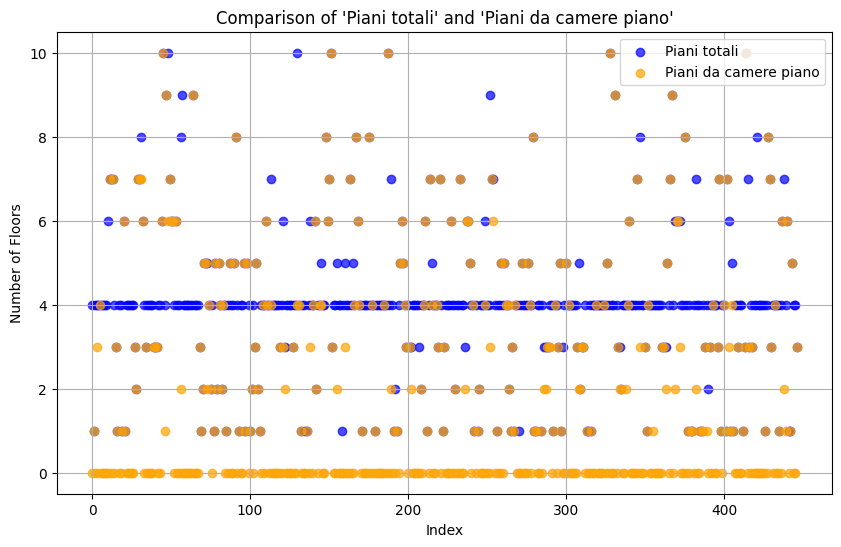

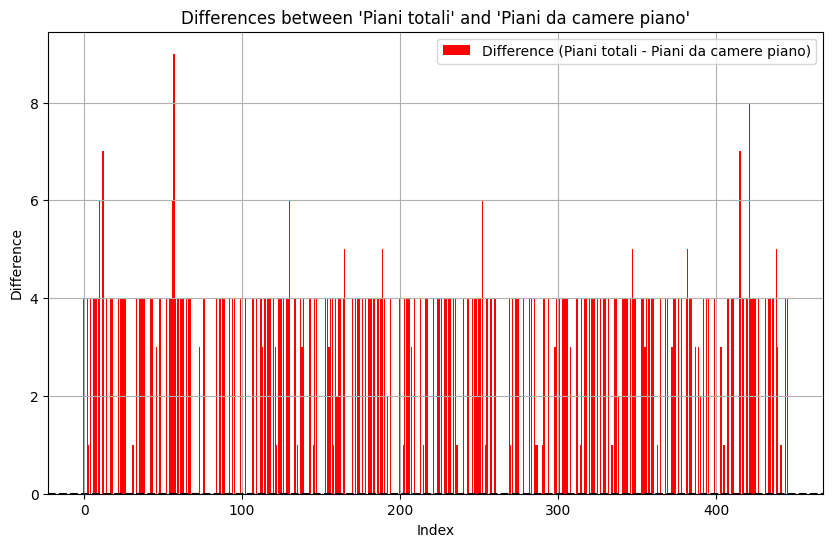

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Piani da camere piano,Difference
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8,5144,6,14,NaN,4,HOTEL MAISON BORELLA,4,0;1;2;3,25,NaN,ALBERGO,0,4
2,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26,2129,3,25,NaN,3,HOTEL BUENOS AIRES,4,0;1;2;3,39,NaN,ALBERGO,0,4
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13,ALBERGO,3,1
4,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33,2129,3,65,NaN,4,GALAXY G SRL,4,0;1;2;3,97,0,ALBERGO,0,4
6,CSO COLOMBO CRISTOFORO N. 15 (z.d. 6),CSO,COLOMBO CRISTOFORO,15,5114,6,39,NaN,3,HOTEL MINERVA,4,0;1;2;3,60,NaN,ALBERGO,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,VLE SUZZANI GIOVANNI N. 13 (z.d. 9),VLE,SUZZANI GIOVANNI,13,1446,9,172,30;11,4,NOVOTEL MILANO NORD,7,1;2;3;4;5;6;7,344,60;22,ALBERGO,2,5
439,VLE SUZZANI GIOVANNI N. 13 (z.d. 9),VLE,SUZZANI GIOVANNI,13,1446,9,131,33,3,HOTEL IBIS MILANO CA GRANDA,4,1;2;3;4,262,66,ALBERGO,1,3
441,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6,2121,3,12,NaN,1,HOTEL SAN TOMASO,1,0,25,0,ALBERGO,0,1
444,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30,2107,2,15,NaN,2,HOTEL CASA MIA,4,0;1;2;3,25,NaN,ALBERGO,0,4


In [57]:
def rooms_is_multiple_of_room_per_floor(row):
  if pd.notna(row['Camere piano']):
    if row['Camere piano'].isnumeric():
      if int(row['Camere piano']) == row['Camere'] / row['Piani totali']:
        rooms = [int(row['Camere piano'])] * int(row['Piani totali'])
        row['Camere piano'] = ";".join(map(str, rooms))
  return row

def beds_is_multiple_of_beds_per_floor(row):
  if pd.notna(row['Posti letto per piano']):
    if row['Posti letto per piano'].isnumeric() and row['Piani totali'] != 1:
      if int(row['Posti letto per piano']) == row['Posti letto'] / row['Piani totali']:
        beds = [int(row['Posti letto per piano'])] * int(row['Piani totali'])
        row['Posti letto per piano'] = ";".join(map(str, beds))
        rooms = [int(row['Camere']) // int(row['Piani totali'])] * int(row['Piani totali'])
        row['Camere piano'] = ";".join(map(str, rooms))
  return row

DATA = DATA.apply(rooms_is_multiple_of_room_per_floor, axis=1)
DATA = DATA.apply(beds_is_multiple_of_beds_per_floor, axis=1)
mismatch = visualize_floors_from_room_per_floor(DATA, display=True)
mismatch

Now we fill null values of 'Camere piano' using the information contained in 'Camere' and 'Piani totali'.

In [58]:
def split_rooms(row):
  if not pd.notna(row['Camere piano']):
    value = row['Camere'] // row['Piani totali']
    remainder = row['Camere'] % row['Piani totali']
    if remainder == 0:
      if value > 0:
        rooms = [value] * row['Piani totali']
        row['Camere piano'] = ";".join(map(str, rooms))
    else:
      rooms = [value] * (row['Piani totali'] - 1)
      rooms.append(value + remainder)
      row['Camere piano'] = ";".join(map(str, rooms))
  return row

DATA = DATA.apply(split_rooms, axis=1)
mismatch = visualize_floors_from_room_per_floor(DATA, display=False)
mismatch

Consistency:  91.3%


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Piani da camere piano,Difference
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13,ALBERGO,3,1
31,LGO AUGUSTO N. 10 (z.d. 1),LGO,AUGUSTO,10,315,1,242,19;36;30;34;33;27;26,4,JOLLY HOTEL PRESIDENT,8,1;2;3;4;5;6;7;8,530,38;70;59;69;67;55;49,ALBERGO,7,1
46,PZA DELLA REPUBBLICA N. 17 (z.d. 2),PZA,DELLA REPUBBLICA,17,1055,2,302,412,5,HOTEL PRINCIPE DI SAVOIA,4,0;1;2;3,725,812,ALBERGO,1,3
48,PZA DELLA REPUBBLICA N. 20 (z.d. 2),PZA,DELLA REPUBBLICA,20,1055,2,228,6;28;29;26;24;13,5L,THE WESTIN PALACE,10,10;1;2;3;4;5;6;7;8;9,441,11;48;43;37;22;20,ALBERGO,6,4
56,PZA LUIGI DI SAVOIA N. 20 (z.d. 2),PZA,LUIGI DI SAVOIA,20,2260,2,106,13;14,4,STARHOTELS ANDERSON,8,1;2;3;4;5;6;7;8,212,16;17,ALBERGO,2,6
73,VIA ASTOLFO N. 5 (z.d. 3),VIA,ASTOLFO,5,2566,3,23,4;5,3,HOTEL VIENNA,5,1;2;3;4;5,35,5;4,ALBERGO,2,3
113,VIA CESARI ANTONIO N. 19 (z.d. 9),VIA,CESARI ANTONIO,19,1603,9,89,18;16;13;3,4,RESIDENCE SILOE,7,1;2;3;4;5;6;7,199,37;27;29;9,RESIDENCE,4,3
121,VIA COPERNICO NICOLO' N. 18 (z.d. 2),VIA,COPERNICO NICOLO',18,1204,2,53,4;12;3,3,HOTEL CLUB,6,0;1;2;3;4;5,73,5;16,ALBERGO,3,3
122,VIA CORNALIA EMILIO N. 7 (z.d. 9),VIA,CORNALIA EMILIO,7,1182,9,26,3;9,2,CLASS,3,1;2;3,52,6;18,RESIDENCE,2,1
130,VIA DE CRISTOFORIS CARLO N. 6 (z.d. 9),VIA,DE CRISTOFORIS CARLO,6,1120,9,125,7;19;76;8,4,RESIDENCE ATAHOTEL THE BIG,10,1;2;3;4;5;6;7;8;9;0,245,16;36,RESIDENCE,4,6


Finally, the remaining mismatches are rows where 'Camere piano' is not null and not coherent with 'Camere' and 'Piani totali': we consider 'Camere' and 'Piani totali' as true and we extend the already present information to make it coherent.

In [59]:
def extend_room_values(row):
  rooms_information = [int(x) for x in row['Camere piano'].split(';') if x.isdigit()]
  already_present_rooms = sum(rooms_information)
  already_present_floors = len(rooms_information)
  missing_rooms = row['Camere'] - already_present_rooms
  missing_floors = row['Piani totali'] - already_present_floors
  if missing_rooms > 0:
    if missing_floors > 0:
      value = missing_rooms // missing_floors
      remainder = missing_rooms % missing_floors
      rooms = []
      if remainder == 0:
          rooms = [value] * missing_floors
      else:
          rooms = [value] * (missing_floors - 1)
          rooms.append(value + remainder)
      row['Camere piano'] += ";"
  else:
    value = row['Camere'] // row['Piani totali']
    remainder = row['Camere'] % row['Piani totali']
    if remainder == 0:
        rooms = [value] * row['Piani totali']
    else:
        rooms = [value] * (row['Piani totali'] - 1)
        rooms.append(value + remainder)
        row['Camere piano'] = ""
  row['Camere piano'] += ";".join(map(str, rooms))
  return row

mismatch = mismatch.apply(extend_room_values, axis=1)

But we also have to update 'Posti letto' and 'Posti letto per piano' because now there are floors that have more rooms than beds. Also, there are rows where 'Posti letto' is greater than the sum of the values in 'Posti letto per piano'.

In [60]:
def correct_beds_values(row):
  beds_information = [int(x) for x in row['Posti letto per piano'].split(';') if x.isdigit()]
  rooms_information = [int(x) for x in row['Camere piano'].split(';') if x.isdigit()]
  already_present_beds = sum(beds_information)
  already_present_floors = len(beds_information)
  missing_beds = row['Posti letto'] - already_present_beds
  missing_floors = row['Piani totali'] - already_present_floors

  # if we have less beds than rooms on a floor, we set the number of beds equal to the number of rooms
  for i in range(min(len(rooms_information), len(beds_information))):
    difference = rooms_information[i] - beds_information[i]
    if difference > 0:
      missing_beds -= difference
      beds_information[i] = rooms_information[i]
      already_present_beds += difference

  if missing_beds > 0:
    if missing_floors > 0:
      value = missing_beds // missing_floors
      remainder = missing_beds % missing_floors
      beds = []
      if remainder == 0:
          beds = [value] * missing_floors
      else:
          beds = [value] * (missing_floors - 1)
          beds.append(value + remainder)
      beds_information += beds
      row['Posti letto per piano'] = ";".join(map(str, beds_information))
    else:
      # we cycle through the floors and add 1 until the remainder goes to 0
      while missing_beds > 0:
        for i in range(len(beds_information) - 1, -1, -1):
          beds_information[i] += 1
          missing_beds -= 1
          if missing_beds == 0:
            break
      row['Posti letto per piano'] = ";".join(map(str, beds_information))
  elif missing_beds < 0:
      # these rows (where Posti letto per piano > Posti letto) are handled in the same way rows with a null values are handled: maybe not optimal
      row['Posti letto per piano'] = np.nan
  else:
      row['Posti letto per piano'] = ";".join(map(str, beds_information))

  return row

mismatch = mismatch.apply(correct_beds_values, axis=1)
DATA.update(mismatch)

In case of null values in 'Posti letto per piano', we give to each floor the average number of beds per floor.

In [61]:
def handle_null_values(row):
  if not pd.notna(row['Posti letto per piano']) or row['Posti letto per piano'] == '0':
    missing_beds = row['Posti letto']
    missing_floors = row['Piani totali']
    value = missing_beds // missing_floors
    remainder = missing_beds % missing_floors
    beds = []
    if remainder == 0:
        beds = [value] * missing_floors
    else:
        beds = [value] * (missing_floors - 1)
        beds.append(value + remainder)
    row['Posti letto per piano'] = ";".join(map(str, beds))
  return row

DATA = DATA.apply(handle_null_values, axis=1)

Inspecting manually, we noticed that the row with index 145 has an incongruency (actually, it was already present in the original dataset): 'Posti letto per piano' has 6 values, while it should only have 5. So, we are going to correct it by merging the last two values.

In [62]:
DATA.loc[145]

,145
Ubicazione,VIA FATEBENEFRATELLI N. 21 (z.d. 1)
Tipo via,VIA
Descrizione via,FATEBENEFRATELLI
Civico,21
Codice via,144
ZD,1
Camere,121
Camere piano,35;0;21;15;50
Categoria,4
Insegna,HOTEL CAVOUR


In [63]:
def correct_error(row):
  beds_information = [int(x) for x in row['Posti letto per piano'].split(';') if x.isdigit()]
  beds_information[-2] += beds_information[-1]
  beds_information.pop(-1)
  row['Posti letto per piano'] = ";".join(map(str, beds_information))
  return row

DATA.loc[145] = correct_error(DATA.loc[145])
DATA

<ipython-input-63-7e1fed31d158>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Posti letto per piano'] = ";".join(map(str, beds_information))


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8,5144,6,14,3;3;3;5,4,HOTEL MAISON BORELLA,4,0;1;2;3,25,6;6;6;7,ALBERGO
1,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18,2129,3,16,16,1,HOTEL AURORA,1,1,25,25,ALBERGO
2,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26,2129,3,25,6;6;6;7,3,HOTEL BUENOS AIRES,4,0;1;2;3,39,9;9;9;12,ALBERGO
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8;12,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13;42,ALBERGO
4,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33,2129,3,65,16;16;16;17,4,GALAXY G SRL,4,0;1;2;3,97,24;24;24;25,ALBERGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6,2121,3,13,16,1,HOTEL KENNEDY,1,6,23,23,ALBERGO
443,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9,2121,3,50,3;6;9;9;9,4,ST. GEORGE HOTEL,5,5;1;2;3;4,99,5;16;26;26;26,ALBERGO
444,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30,2107,2,15,3;3;3;6,2,HOTEL CASA MIA,4,0;1;2;3,25,6;6;6;7,ALBERGO
445,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1,1170,9,32,8;8;8;8,4,CASA ALBERGO RESIDENCE ZARA LAGOSTA,4,0;1;2;3,64,16;16;16;16,RESIDENCE


Let's see the rows that have inconsistent values between 'Camere and 'Camere piano'.

Consistency:  81.0%


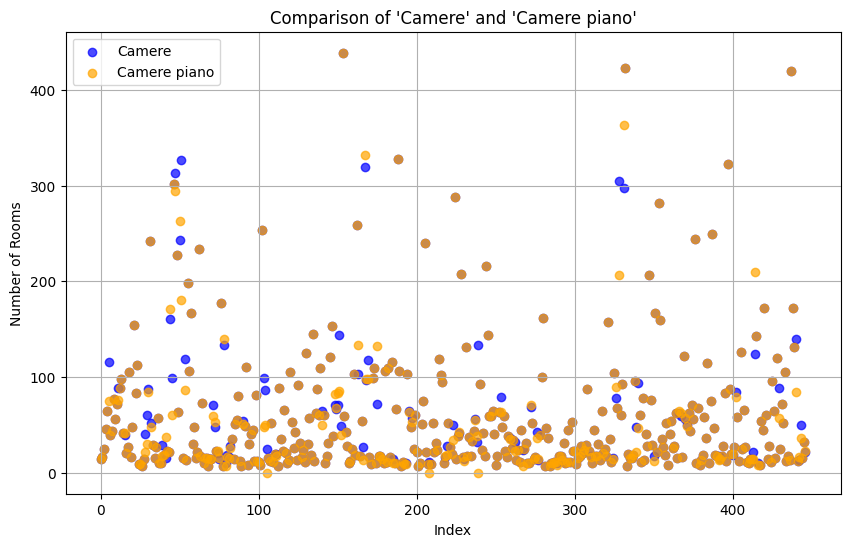

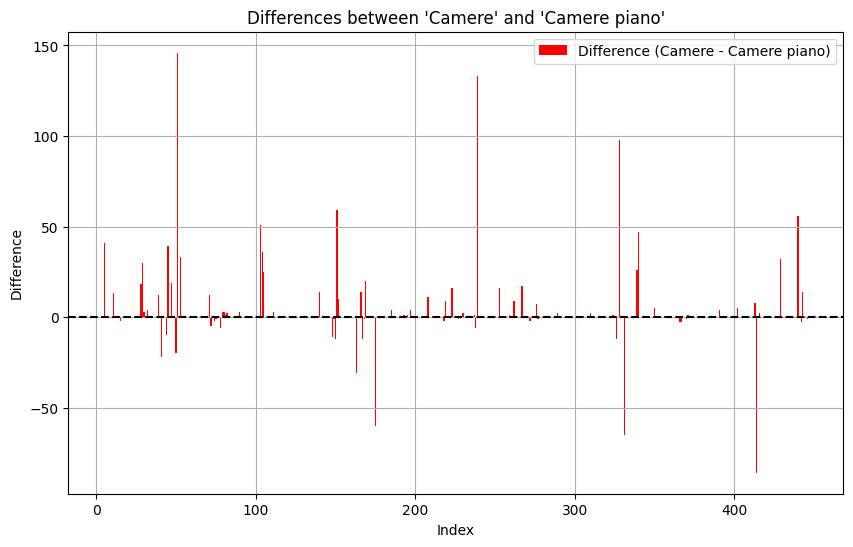

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Camere piano totale,Difference
5,CSO BUENOS AIRES N. 3 (z.d. 3),CSO,BUENOS AIRES,3,2129,3,116,4;23;24;24,4,CRISTOFORO COLOMBO,4,2;3;4;5,191,5;38;40;40,ALBERGO,75,41
11,CSO EUROPA N. 9 (z.d. 1),CSO,EUROPA,9,300,1,89,12;12;12;12;12;11;5,4,HOTEL GALILEO,7,1;2;3;4;5;6;7,159,22;22;22;22;22;21;6,ALBERGO,76,13
15,CSO ITALIA N. 11 (z.d. 1),CSO,ITALIA,11,526,1,39,8;16;17,3,HOTEL ZURIGIO,3,0;1;2,70,14;24;21,ALBERGO,41,-2
28,CSO VERCELLI N. 61 (z.d. 7),CSO,VERCELLI,61,6193,7,40,11;11,3,HOTEL METRO,2,1;2,64,19;19,ALBERGO,22,18
29,CSO BUENOS AIRES N. 5 (z.d. 3),CSO,BUENOS AIRES,5,2129,3,60,3;10;;;;4;13,4,HOTEL CITY,7,1;6;2;5;4;7;3,100,3;14;;;;7;22,NOT SPECIFIED,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,VLE MONZA N. 139 (z.d. 2),VLE,MONZA,139,2274,2,89,9;9;9;9;9;9;3,4,RESIDENCE ATAHOTEL LINEA UNO,7,1;2;3;4;5;6;7,254,20;20;20;20;20;20;6,RESIDENCE,57,32
440,VLE TESTI FULVIO N. 300 (z.d. 9),VLE,TESTI FULVIO,300,1441,9,140,15;15;15;15;15;9,4,STARHOTELS TOURIST,6,6;1;2;3;4;5,250,29;29;29;29;29;9,ALBERGO,84,56
442,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6,2121,3,13,16,1,HOTEL KENNEDY,1,6,23,23,ALBERGO,16,-3
443,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9,2121,3,50,3;6;9;9;9,4,ST. GEORGE HOTEL,5,5;1;2;3;4,99,5;16;26;26;26,ALBERGO,36,14


In [64]:
mismatch = visualize_rooms(DATA, display=True)
mismatch

These rows have 'Camere piano' of the correct length, but not coherent with 'Camere': we are now going to deal with the rows where 'Camere piano' has a smaller value than 'Camere' (we are going to deal with the other case later).

In [65]:
def handle_error(row):
  rooms = [int(x) if x.isdigit() else 0 for x in row['Camere piano'].split(';')]
  missing_rooms = row['Difference']
  zero_values = rooms.count(0)

  if missing_rooms >= 0 and zero_values > 0:
    value = missing_rooms // zero_values
    for i in range(len(rooms)):
      if rooms[i] == 0:
        rooms[i] = value
        missing_rooms -= rooms[i]

  if rooms[-1] + missing_rooms < 0:
    pass # we are going to deal with them later
  else:
    # we add the missing rooms to the last floor
    rooms[-1] += missing_rooms
    row['Camere piano'] = ";".join(map(str, rooms))
  return row

mismatch = mismatch.apply(handle_error, axis=1)
DATA.update(mismatch)

We need to adjust again 'Posti letto' and 'Posti letto per piano': now there may be rows that have again more rooms than beds on some floors.

In [66]:
DATA = DATA.apply(correct_beds_values, axis=1)

In [67]:
DATA = DATA.apply(handle_null_values, axis=1)

In [68]:
DATA

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8,5144,6,14,3;3;3;5,4,HOTEL MAISON BORELLA,4,0;1;2;3,25,6;6;6;7,ALBERGO
1,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18,2129,3,16,16,1,HOTEL AURORA,1,1,25,25,ALBERGO
2,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26,2129,3,25,6;6;6;7,3,HOTEL BUENOS AIRES,4,0;1;2;3,39,9;9;9;12,ALBERGO
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8;12,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13;42,ALBERGO
4,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33,2129,3,65,16;16;16;17,4,GALAXY G SRL,4,0;1;2;3,97,24;24;24;25,ALBERGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6,2121,3,13,13,1,HOTEL KENNEDY,1,6,23,23,ALBERGO
443,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9,2121,3,50,3;6;9;9;23,4,ST. GEORGE HOTEL,5,5;1;2;3;4,99,5;16;26;26;26,ALBERGO
444,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30,2107,2,15,3;3;3;6,2,HOTEL CASA MIA,4,0;1;2;3,25,6;6;6;7,ALBERGO
445,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1,1170,9,32,8;8;8;8,4,CASA ALBERGO RESIDENCE ZARA LAGOSTA,4,0;1;2;3,64,16;16;16;16,RESIDENCE


Now, we still to deal with the rows where 'Camere piano' has a greater value than 'Camere': we decided that, in this case, we are going to trust 'Camere piano' and update 'Camere'. If 'Camere piano' is also greater than 'Posti letto', then we are also going to update 'Posti letto' and 'Posti letto per piano' accordingly (i.e., 'Posti letto' becomes equal to the new 'Camere' value and the 'Posti letto per piano' sequence becomes equal to the 'Camere piano' one).

In [69]:
mismatch = visualize_rooms(DATA, display=False)
print(mismatch.shape[0])
mismatch

Consistency:  98.0%
9


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Camere piano totale,Difference
41,PZA BECCARIA CESARE N. 6 (z.d. 1),PZA,BECCARIA CESARE,6,306,1,15,7;20;10,1,HOTEL NUOVO,3,1;2;3,33,11;11;11,ALBERGO,37,-22
44,PZA DEL DUOMO N. 25 (z.d. 1),PZA,DEL DUOMO,25,1,1,161,29;30;50;38;22;2,4,GRAND HOTEL DUOMO,6,1;2;3;4;5;6,244,42;46;62;60;31;3,ALBERGO,171,-10
148,VIA FERRUCCI FRANCESCO N. 10 (z.d. 8),VIA,FERRUCCI FRANCESCO,10,7150,8,71,11;12;12;12;12;8;8;7,3,HOTEL SCALA NORD,8,8;1;2;3;4;5;6;7,95,11;11;11;11;11;11;11;18,ALBERGO,82,-11
150,VIA FILZI FABIO N. 43 (z.d. 2),VIA,FILZI FABIO,43,1190,2,71,7;13;13;13;13;13;11,3,NUOVO MONOPOLE,7,1;2;3;4;5;6;7,125,12;19;19;19;19;19;18,ALBERGO,83,-12
163,VIA GALILEI GALILEO N. 2 (z.d. 2),VIA,GALILEI GALILEO,2,1102,2,103,18;18;18;18;18;27;17,4,HOTEL WINDSOR,7,1;2;3;4;5;8;7,196,28;28;28;28;28;28;28,ALBERGO,134,-31
167,VIA GALVANI LUIGI N. 12 (z.d. 2),VIA,GALVANI LUIGI,12,1179,2,320,46;67;68;47;51;23;20;10,4,HILTON MILAN,8,2;3;4;5;6;7;8;9,469,62;89;88;64;67;45;36;18,ALBERGO,332,-12
175,VIA GIUSTI GIUSEPPE N. 6 (z.d. 1),VIA,GIUSTI GIUSEPPE,6,7127,1,72,6;20;20;22;22;18;18;6,3,GIUSTI 6,8,8;1;2;3;4;5;6;7,169,21;21;21;21;21;21;21;22,RESIDENCE,132,-60
331,VIA SENIGALLIA N. 6 (z.d. 9),VIA,SENIGALLIA,6,1708,9,298,40;0;40;40;40;63;56;56;28,4,LEONARDO DA VINCI,9,1;9;2;3;4;5;6;7;8,864,96;96;96;96;96;96;96;96;96,ALBERGO,363,-65
414,VLE DORIA ANDREA N. 22 (z.d. 3),VLE,DORIA ANDREA,22,2230,3,124,12;22;22;22;22;22;22;22;22;22,4,DORIA GRAND HOTEL,10,1;2;3;4;5;6;7;8;9;0,234,23;23;23;23;23;23;24;24;24;24,ALBERGO,210,-86


In [70]:
def update_trusting_room_per_floor(row):
  rooms = [int(x) for x in row['Camere piano'].split(';') if x.isdigit()]
  beds = [int(x) for x in row['Posti letto per piano'].split(';') if x.isdigit()]
  floors = row['Piani totali']
  row['Camere'] = sum(rooms)
  if row['Posti letto'] < row['Camere']:
    row['Posti letto'] = row['Camere']
    row['Posti letto per piano'] = row['Camere piano']
  return row

mismatch = mismatch.apply(update_trusting_room_per_floor, axis=1)
print(mismatch.shape[0])
mismatch

9


,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,Camere piano totale,Difference
41,PZA BECCARIA CESARE N. 6 (z.d. 1),PZA,BECCARIA CESARE,6,306,1,37,7;20;10,1,HOTEL NUOVO,3,1;2;3,37,7;20;10,ALBERGO,37,-22
44,PZA DEL DUOMO N. 25 (z.d. 1),PZA,DEL DUOMO,25,1,1,171,29;30;50;38;22;2,4,GRAND HOTEL DUOMO,6,1;2;3;4;5;6,244,42;46;62;60;31;3,ALBERGO,171,-10
148,VIA FERRUCCI FRANCESCO N. 10 (z.d. 8),VIA,FERRUCCI FRANCESCO,10,7150,8,82,11;12;12;12;12;8;8;7,3,HOTEL SCALA NORD,8,8;1;2;3;4;5;6;7,95,11;11;11;11;11;11;11;18,ALBERGO,82,-11
150,VIA FILZI FABIO N. 43 (z.d. 2),VIA,FILZI FABIO,43,1190,2,83,7;13;13;13;13;13;11,3,NUOVO MONOPOLE,7,1;2;3;4;5;6;7,125,12;19;19;19;19;19;18,ALBERGO,83,-12
163,VIA GALILEI GALILEO N. 2 (z.d. 2),VIA,GALILEI GALILEO,2,1102,2,134,18;18;18;18;18;27;17,4,HOTEL WINDSOR,7,1;2;3;4;5;8;7,196,28;28;28;28;28;28;28,ALBERGO,134,-31
167,VIA GALVANI LUIGI N. 12 (z.d. 2),VIA,GALVANI LUIGI,12,1179,2,332,46;67;68;47;51;23;20;10,4,HILTON MILAN,8,2;3;4;5;6;7;8;9,469,62;89;88;64;67;45;36;18,ALBERGO,332,-12
175,VIA GIUSTI GIUSEPPE N. 6 (z.d. 1),VIA,GIUSTI GIUSEPPE,6,7127,1,132,6;20;20;22;22;18;18;6,3,GIUSTI 6,8,8;1;2;3;4;5;6;7,169,21;21;21;21;21;21;21;22,RESIDENCE,132,-60
331,VIA SENIGALLIA N. 6 (z.d. 9),VIA,SENIGALLIA,6,1708,9,363,40;0;40;40;40;63;56;56;28,4,LEONARDO DA VINCI,9,1;9;2;3;4;5;6;7;8,864,96;96;96;96;96;96;96;96;96,ALBERGO,363,-65
414,VLE DORIA ANDREA N. 22 (z.d. 3),VLE,DORIA ANDREA,22,2230,3,210,12;22;22;22;22;22;22;22;22;22,4,DORIA GRAND HOTEL,10,1;2;3;4;5;6;7;8;9;0,234,23;23;23;23;23;23;24;24;24;24,ALBERGO,210,-86


In [71]:
DATA.update(mismatch)

Let's now check if, for each floor, the number of beds is greater or equal to the number of rooms.

In [72]:
def check_camere_piano_vs_posti_letto_per_piano(DATA):
    conflict_data = []
    for index, row in DATA.iterrows():
        try:
            camere_piano = list(map(int, str(row['Camere piano']).split(';')))
            posti_letto_piano = list(map(int, str(row['Posti letto per piano']).split(';')))
            # Check for length mismatch or logical issues
            if len(camere_piano) != len(posti_letto_piano):
                conflict_data.append({
                    'Index': index,
                    'Camere piano': camere_piano,
                    'Posti letto per piano': posti_letto_piano,
                    'Issue': 'Length mismatch'
                })
            else:
                for c, p in zip(camere_piano, posti_letto_piano):
                    if p < c:  # More rooms than beds
                        conflict_data.append({
                            'Index': index,
                            'Camere piano': camere_piano,
                            'Posti letto per piano': posti_letto_piano,
                            'Issue': 'More rooms than beds on floors'
                        })
                        break
                    if p != 0 and c == 0:
                        conflict_data.append({
                            'Index': index,
                            'Camere piano': camere_piano,
                            'Posti letto per piano': posti_letto_piano,
                            'Issue': 'No rooms on floors'
                        })
                        break
        except ValueError:
            # Skip rows with invalid semicolon-separated values: should not happen, but in case of bugs it might be useful
            conflict_data.append({
                'Index': index,
                'Camere piano': row['Camere piano'],
                'Posti letto per piano': row['Posti letto per piano'],
                'Issue': 'Invalid format'
            })
    consistency = 1 - len(conflict_data) / DATA.shape[0]
    print(f"Consistency:  {consistency * 100:.1f}%")
    return pd.DataFrame(conflict_data)

conflicts = check_camere_piano_vs_posti_letto_per_piano(DATA)
print(conflicts.shape[0])
conflicts

Consistency:  97.1%
13


,Index,Camere piano,Posti letto per piano,Issue
0,42,"[5, 5, 5, 8]","[6, 6, 6, 6]",More rooms than beds on floors
1,89,"[1, 1, 1, 4]","[2, 2, 2, 3]",More rooms than beds on floors
2,130,"[7, 19, 76, 8, 2, 2, 2, 2, 2, 5]","[24, 24, 24, 24, 24, 24, 24, 24, 24, 29]",More rooms than beds on floors
3,133,"[4, 4, 4, 7]","[6, 6, 6, 6]",More rooms than beds on floors
4,145,"[35, 0, 21, 15, 50]","[58, 3, 42, 41, 80]",No rooms on floors
5,148,"[11, 12, 12, 12, 12, 8, 8, 7]","[11, 11, 11, 11, 11, 11, 11, 18]",More rooms than beds on floors
6,175,"[6, 20, 20, 22, 22, 18, 18, 6]","[21, 21, 21, 21, 21, 21, 21, 22]",More rooms than beds on floors
7,181,"[2, 2, 2, 5]","[4, 4, 4, 4]",More rooms than beds on floors
8,238,"[7, 7, 6, 6, 6, 0]","[8, 8, 8, 8, 8, 8]",No rooms on floors
9,331,"[40, 0, 40, 40, 40, 63, 56, 56, 28]","[96, 96, 96, 96, 96, 96, 96, 96, 96]",No rooms on floors


There are some rows where there are no rooms on a floor, while having beds on that floor: this is obviously not correct, so we redistribute those beds to the other floors.

In [73]:
def handle_zero_values_in_rooms(row):
  rooms = [int(x) for x in row['Camere piano'].split(';') if x.isdigit()]
  beds = [int(x) for x in row['Posti letto per piano'].split(';') if x.isdigit()]
  floors = row['Piani totali']
  zero_values = rooms.count(0)
  if zero_values > 0:
    beds_to_redistribute = 0
    last_valid_floor = 0
    for i in range(len(beds)):
      if rooms[i] == 0:
        beds_to_redistribute += beds[i]
        beds[i] = 0
      else:
        last_valid_floor = i
    num_of_valid_floors = floors - zero_values
    while beds_to_redistribute != 0:
      value = beds_to_redistribute // num_of_valid_floors
      remainder = beds_to_redistribute % num_of_valid_floors
      for i in range(len(beds)):
        if beds[i] != 0:
          if i < last_valid_floor:
            beds[i] += value
            beds_to_redistribute -= value
          else:
            beds[i] += value + remainder
            beds_to_redistribute -= value + remainder
    row['Posti letto per piano'] = ";".join(map(str, beds))
  return row

In [74]:
DATA = DATA.apply(handle_zero_values_in_rooms, axis=1)

In [75]:
check_camere_piano_vs_posti_letto_per_piano(DATA)

Consistency:  97.8%


,Index,Camere piano,Posti letto per piano,Issue
0,42,"[5, 5, 5, 8]","[6, 6, 6, 6]",More rooms than beds on floors
1,89,"[1, 1, 1, 4]","[2, 2, 2, 3]",More rooms than beds on floors
2,130,"[7, 19, 76, 8, 2, 2, 2, 2, 2, 5]","[24, 24, 24, 24, 24, 24, 24, 24, 24, 29]",More rooms than beds on floors
3,133,"[4, 4, 4, 7]","[6, 6, 6, 6]",More rooms than beds on floors
4,148,"[11, 12, 12, 12, 12, 8, 8, 7]","[11, 11, 11, 11, 11, 11, 11, 18]",More rooms than beds on floors
5,175,"[6, 20, 20, 22, 22, 18, 18, 6]","[21, 21, 21, 21, 21, 21, 21, 22]",More rooms than beds on floors
6,181,"[2, 2, 2, 5]","[4, 4, 4, 4]",More rooms than beds on floors
7,337,"[4, 4, 4, 7]","[6, 6, 6, 6]",More rooms than beds on floors
8,339,"[6, 6, 6, 30]","[24, 24, 24, 25]",More rooms than beds on floors
9,446,"[12, 7, 3]","[11, 11, 13]",More rooms than beds on floors


Now we deal with the rows where there are more rooms than beds on some floors: we decided to update 'Posti letto' and 'Posti letto per piano' so that the constraint is satisfied.

In [76]:
def correct_beds(row):
  beds = [int(x) for x in row['Posti letto per piano'].split(';') if x.isdigit()]
  rooms = [int(x) for x in row['Camere piano'].split(';') if x.isdigit()]
  floors = row['Piani totali']
  added_beds = 0
  for i in range(len(beds)):
    if rooms[i] > beds[i]:
      added_beds += rooms[i] - beds[i]
      beds[i] = rooms[i]
  if added_beds > 0:
    row['Posti letto'] += added_beds
    row['Posti letto per piano'] = ";".join(map(str, beds))
  return row

DATA = DATA.apply(correct_beds, axis=1)

**6) DATA CLEANING: OUTLIER DETECTION**

First, we are going to use histograms to visualize the distribution of 'Piani totali'. Histograms can be useful and immediate because the values are in a limited range. We expect that the most frequent value is 4 because it is the result of the imputation process.

<Axes: xlabel='Piani totali', ylabel='Count'>

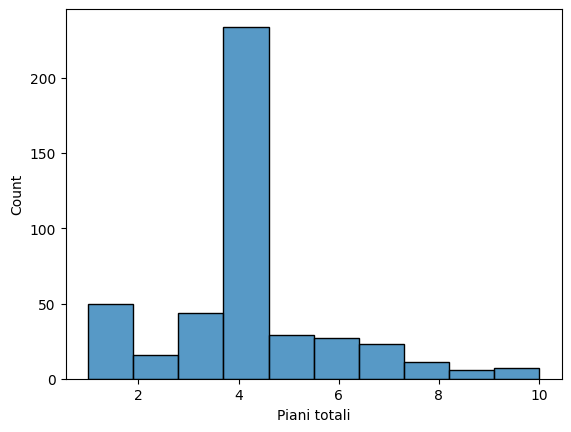

In [77]:
sns.histplot(DATA['Piani totali'])

Now we are going to use scatter plots to visualize the relationships between 'Camere' and 'Posti letto', 'Camere' and 'Piani totali', and 'Posti letto' and 'Piani totali'.

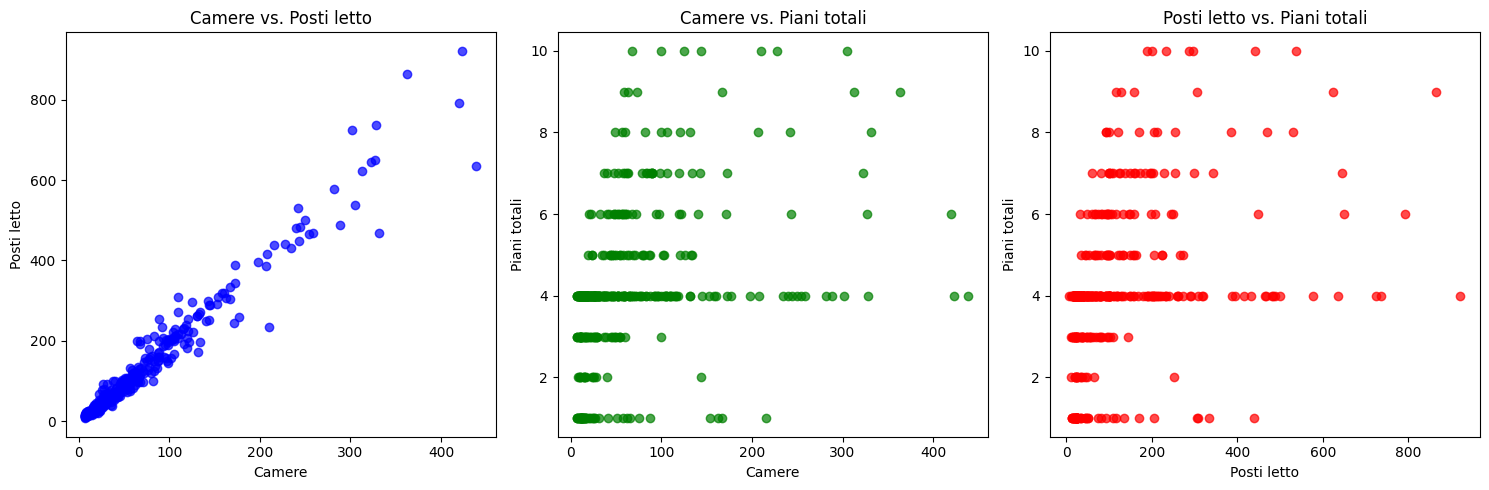

In [78]:
# Scatter plot to visualize relationships between numeric columns and outliers
plt.figure(figsize=(15, 5))

# Scatter plot: Camere vs. Posti letto
plt.subplot(1, 3, 1)
plt.scatter(DATA["Camere"], DATA["Posti letto"], alpha=0.7, color="blue")
plt.xlabel("Camere")
plt.ylabel("Posti letto")
plt.title("Camere vs. Posti letto")

# Scatter plot: Camere vs. Piani totali
plt.subplot(1, 3, 2)
plt.scatter(DATA["Camere"], DATA["Piani totali"], alpha=0.7, color="green")
plt.xlabel("Camere")
plt.ylabel("Piani totali")
plt.title("Camere vs. Piani totali")

# Scatter plot: Posti letto vs. Piani totali
plt.subplot(1, 3, 3)
plt.scatter(DATA["Posti letto"], DATA["Piani totali"], alpha=0.7, color="red")
plt.xlabel("Posti letto")
plt.ylabel("Piani totali")
plt.title("Posti letto vs. Piani totali")

plt.tight_layout()
plt.show()

From these graphs we can see that there are strange combinations of values: for instance, there are several rows where 'Camere' has a value greater than 50 but 'Piani totali' is equal to 1. Let's see which are these rows.

In [79]:
DATA.loc[(DATA['Piani totali'] == 1) & (DATA['Camere'] > 50)]

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
21,CSO MATTEOTTI GIACOMO N. 4 (z.d. 1),CSO,MATTEOTTI GIACOMO,4,218,1,154,154,5L,BOSCOLO HOTEL EXEDRA,1,0,308,308,ALBERGO
85,VIA BOSCOVICH RUGGERO N. 59 (z.d. 3),VIA,BOSCOVICH RUGGERO,59,2131,3,51,51,3,HOTEL SERENA,1,0,108,108,ALBERGO
132,VIA DEI FONTANILI N. 26 (z.d. 5),VIA,DEI FONTANILI,26,4224,5,57,57,4,MIHOTEL,1,0,75,75,ALBERGO
136,VIA DELL' ORSO N. 7 (z.d. 1),VIA,DELL' ORSO,7,123,1,62,62,4,HOTEL MILANO SCALA,1,0,115,115,ALBERGO
244,VIA OLGETTINA N. 60 (z.d. 3),VIA,OLGETTINA,60,2530,3,216,216,3,HOTEL RAFAEL,1,0,439,439,ALBERGO
280,VIA POLONIA N. 10 (z.d. 8),VIA,POLONIA,10,7505,8,162,162,4,THE HUB,1,0,306,306,ALBERGO
351,VIA STAMIRA D'ANCONA N. 27 (z.d. 2),VIA,STAMIRA D'ANCONA,27,2337,2,167,167,4,RAMADA PLAZA MILANO,1,0,334,334,ALBERGO
386,VIA VIGEVANO N. 13 (z.d. 6),VIA,VIGEVANO,13,5116,6,75,75,3,LA DARSENA,1,0,204,204,RESIDENCE
398,VIA WATT GIACOMO N. 13 (z.d. 6),VIA,WATT GIACOMO,13,5292,6,87,87,4,IDEA HOTEL MILANO WATTTREDICI,1,0,169,169,ALBERGO
426,VLE MONTE GRAPPA N. 12 (z.d. 9),VLE,MONTE GRAPPA,12,1101,9,65,65,4,MAISON MOSCHINO,1,0,135,135,ALBERGO


We checked the original dataset and these outliers are present because originally in these rows 'Camere piano' simply contained the value of 'Camere' (and the same goes for 'Posti letto per piano' and 'Posti letto'), while missing the information about 'Piani totali' and 'Piano piano': according to what we have done above, the value of 'Piani totali' is assumed to be 1. However, there was little we could do differently since there was no other information we could extract about floors: : the only other option was using the result of the imputation process, but we decided to trust the already present information.

Let's now check if there are rows where the ratio between 'Posti letto per piano' and 'Camere piano' is strange (for instance, < 1 or > 4).

In [80]:
DATA_COPY = DATA.copy()
DATA_COPY["rooms_list"] = DATA_COPY["Camere piano"].apply(lambda x: list(map(int, x.split(";"))))
DATA_COPY["beds_list"] = DATA_COPY["Posti letto per piano"].apply(lambda x: list(map(int, x.split(";"))))

DATA_COPY["ratios"] = DATA_COPY.apply(lambda row: [beds / rooms if rooms != 0 else None for rooms, beds in zip(row["rooms_list"], row["beds_list"])], axis=1)

def is_strange_ratio(ratios):
    return any(ratio < 1 or ratio > 4 for ratio in ratios if ratio is not None)

DATA_COPY["has_strange_ratios"] = DATA_COPY["ratios"].apply(is_strange_ratio)
strange_rows = DATA_COPY[DATA_COPY["has_strange_ratios"]]

strange_rows

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra,rooms_list,beds_list,ratios,has_strange_ratios
29,CSO BUENOS AIRES N. 5 (z.d. 3),CSO,BUENOS AIRES,5,2129,3,60,3;10;10;10;10;4;13,4,HOTEL CITY,7,1;6;2;5;4;7;3,100,3;14;10;22;17;17;17,NOT SPECIFIED,"[3, 10, 10, 10, 10, 4, 13]","[3, 14, 10, 22, 17, 17, 17]","[1.0, 1.4, 1.0, 2.2, 1.7, 4.25, 1.307692307692...",True
51,PZA FONTANA N. 3 (z.d. 1),PZA,FONTANA,3,308,1,327,45;43;45;41;6;147,4,STARHOTELS ROSA GRAND,6,1;2;3;4;5;6,650,111;109;107;98;44;181,ALBERGO,"[45, 43, 45, 41, 6, 147]","[111, 109, 107, 98, 44, 181]","[2.466666666666667, 2.5348837209302326, 2.3777...",True
80,VIA BONNET NINO N. 6 (z.d. 9),VIA,BONNET NINO,6,1109,9,19,2;4;4;4;5,2,RESIDENCE BONNET,5,1;2;5;6;7,45,9;9;9;9;9,RESIDENCE,"[2, 4, 4, 4, 5]","[9, 9, 9, 9, 9]","[4.5, 2.25, 2.25, 2.25, 1.8]",True
121,VIA COPERNICO NICOLO' N. 18 (z.d. 2),VIA,COPERNICO NICOLO',18,1204,2,53,4;12;3;11;11;12,3,HOTEL CLUB,6,0;1;2;3;4;5,73,5;16;13;13;13;13,ALBERGO,"[4, 12, 3, 11, 11, 12]","[5, 16, 13, 13, 13, 13]","[1.25, 1.3333333333333333, 4.333333333333333, ...",True
130,VIA DE CRISTOFORIS CARLO N. 6 (z.d. 9),VIA,DE CRISTOFORIS CARLO,6,1120,9,125,7;19;76;8;2;2;2;2;2;5,4,RESIDENCE ATAHOTEL THE BIG,10,1;2;3;4;5;6;7;8;9;0,297,24;24;76;24;24;24;24;24;24;29,RESIDENCE,"[7, 19, 76, 8, 2, 2, 2, 2, 2, 5]","[24, 24, 76, 24, 24, 24, 24, 24, 24, 29]","[3.4285714285714284, 1.263157894736842, 1.0, 3...",True
219,VIA MARCELLO BENEDETTO N. 83 (z.d. 3),VIA,MARCELLO BENEDETTO,83,2128,3,28,3;8;17,2,HOTEL THE BEST,3,0;1;2,56,13;18;25,ALBERGO,"[3, 8, 17]","[13, 18, 25]","[4.333333333333333, 2.25, 1.4705882352941178]",True
286,VIA PORPORA NICOLA ANTONIO N. 16 (z.d. 3),VIA,PORPORA NICOLA ANTONIO,16,2229,3,10,3;4;3,1,PAOLA,3,3;1;2,24,4;7;13,ALBERGO,"[3, 4, 3]","[4, 7, 13]","[1.3333333333333333, 1.75, 4.333333333333333]",True
293,VIA PRATI GIOVANNI N. 6 (z.d. 8),VIA,PRATI GIOVANNI,6,7149,8,31,1;10;10;10,3,HOTEL JOHNNY,4,0;1;2;3,69,17;17;17;18,ALBERGO,"[1, 10, 10, 10]","[17, 17, 17, 18]","[17.0, 1.7, 1.7, 1.8]",True
367,VIA TORRIANI NAPO N. 15 (z.d. 2),VIA,TORRIANI NAPO,15,2126,2,59,8;8;8;8;7;7;7;5;1,3,HOTEL CANOVA,9,1;2;3;4;5;6;7;8;9,127,14;14;14;14;15;15;15;13;13,ALBERGO,"[8, 8, 8, 8, 7, 7, 7, 5, 1]","[14, 14, 14, 14, 15, 15, 15, 13, 13]","[1.75, 1.75, 1.75, 1.75, 2.142857142857143, 2....",True
400,VLE ARGONNE N. 14 (z.d. 4),VLE,ARGONNE,14,3254,4,19,6;8;2;3,3,ALBERGO SUSA,4,2;3;0;1,37,10;10;10;7,ALBERGO,"[6, 8, 2, 3]","[10, 10, 10, 7]","[1.6666666666666667, 1.25, 5.0, 2.333333333333...",True


Here the outliers probably are due to how we dealt with inconsistencies between the number of rooms and the number of beds: we distributed the missing beds without caring for the beds/room ratio, resulting in this kind of situation.

**7) DATA CLEANING: DATA DEDUPLICATION**

We are going to use the Jaro-Winkler similarity measure to compare the 'Insegna' values: we block on 'Descrizione via' to reduce the search space. We also exclude some common words (e.g., "Hotel"). In fact, 'Insegna' should be a unique column combination.

In [81]:
def clean_insegna(text):
    words_to_ignore = ['HOTEL', 'ALBERGO', 'RESIDENCE']
    pattern = r'\b(?:' + '|'.join(words_to_ignore) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE).strip()

DATA_TEMP = DATA.copy()
DATA_TEMP['Insegna'] = DATA_TEMP['Insegna'].apply(clean_insegna)

indexer = recordlinkage.Index()
indexer.block('Descrizione via')
candidate_links = indexer.index(DATA_TEMP)
compare_cl = recordlinkage.Compare()
compare_cl.string('Insegna', 'Insegna', method='jarowinkler', threshold=0.85, label='Insegna')
features = compare_cl.compute(candidate_links, DATA_TEMP)
matches = features[features['Insegna'] > 0]
if not matches.empty:
    print("Matching pairs of rows:", matches.shape[0], "\n\n")
    for idx1, idx2 in matches.index:
        print("Row 1:")
        print(DATA.iloc[idx1])
        print("\nRow 2:")
        print(DATA.iloc[idx2])
        print("-" * 50 + "\n\n")
else:
    print("No matches found.")

Matching pairs of rows: 7 


Row 1:
Ubicazione                       CSO COLOMBO CRISTOFORO N. 15 (z.d. 6)
Tipo via                                                           CSO
Descrizione via                                     COLOMBO CRISTOFORO
Civico                                                              15
Codice via                                                        5114
ZD                                                                   6
Camere                                                              44
Camere piano                                               11;11;11;11
Categoria                                                            3
Insegna                                                  HOTEL MINERVA
Piani totali                                                         4
Piano piano                                                    0;1;2;3
Posti letto                                                         67
Posti letto per piano                    

Given the possible matches above, we decide that:


*   If the 'Civico' value or the 'Tipo attività' is different, they do not match.
*   Otherwise, they match and we keep the row with the highest index (since it may mean that the information is fresher) and we drop the other.



In [82]:
if not matches.empty:
    for idx1, idx2 in matches.index:
      if DATA.iloc[idx1]['Civico'] == DATA.iloc[idx2]['Civico'] and DATA.iloc[idx1]['Tipo attività strutture extra'] == DATA.iloc[idx2]['Tipo attività strutture extra']:
        if idx1 > idx2:
          DATA.drop(index=idx2, inplace=True)
        else:
          DATA.drop(index=idx1, inplace=True)

DATA = DATA.reset_index(drop=True)
DATA

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività strutture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8,5144,6,14,3;3;3;5,4,HOTEL MAISON BORELLA,4,0;1;2;3,25,6;6;6;7,ALBERGO
1,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18,2129,3,16,16,1,HOTEL AURORA,1,1,25,25,ALBERGO
2,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26,2129,3,25,6;6;6;7,3,HOTEL BUENOS AIRES,4,0;1;2;3,39,9;9;9;12,ALBERGO
3,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2,2129,3,46,15;11;8;12,3,ALBERGO FENICE,4,1;2;3;4,98,24;19;13;42,ALBERGO
4,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33,2129,3,65,16;16;16;17,4,GALAXY G SRL,4,0;1;2;3,97,24;24;24;25,ALBERGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6,2121,3,13,13,1,HOTEL KENNEDY,1,6,23,23,ALBERGO
442,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9,2121,3,50,3;6;9;9;23,4,ST. GEORGE HOTEL,5,5;1;2;3;4,99,5;16;26;26;26,ALBERGO
443,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30,2107,2,15,3;3;3;6,2,HOTEL CASA MIA,4,0;1;2;3,25,6;6;6;7,ALBERGO
444,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1,1170,9,32,8;8;8;8,4,CASA ALBERGO RESIDENCE ZARA LAGOSTA,4,0;1;2;3,64,16;16;16;16,RESIDENCE


**FINAL DATA QUALITY ASSESSMENT**

We now recompute the completeness and consistency dimensions to see the improvements.

In [83]:
not_null = DATA.count().sum()
nulls = DATA.isnull().sum()
total_cells = DATA.shape[0]*DATA.shape[1]
completeness = (not_null/total_cells)
COMPLETENESS = '{0:.1f}%'.format(completeness*100)
COMPLETENESS

'100.0%'

Now we compute accuracy.

In [84]:
possible_values = ['1', '2', '3', '4', '5', '5L']
CORRECT = DATA['Categoria'].isin(possible_values)
CORRECT_CATEGORIA = np.sum(CORRECT)
NOT_NULL_CATEGORIA = DATA['Categoria'].count()
ACCURACY_CATEGORIA = CORRECT_CATEGORIA/NOT_NULL_CATEGORIA
ACCURACY_CATEGORIA = '{0:.1f}%'.format(ACCURACY_CATEGORIA*100)
print(ACCURACY_CATEGORIA)

98.7%


Let's also compute the consistency dimension.

In [85]:
print("Piani totali vs Piano piano")
check1 = visualize_floors(DATA, display=False)
print("\nCamere vs Camere piano")
check2 = visualize_rooms(DATA, display=False)
print("\nPosti letto vs Posti letto per piano")
check3 = visualize_beds(DATA, display=False)
print("\nCamere piano vs Piani totali")
check4 = visualize_floors_from_room_per_floor(DATA, display=False)
print("\nCamere piano vs Posti letto per piano")
check5 = check_camere_piano_vs_posti_letto_per_piano(DATA)

Piani totali vs Piano piano
Consistency:  100.0%

Camere vs Camere piano
Consistency:  100.0%

Posti letto vs Posti letto per piano
Consistency:  100.0%

Camere piano vs Piani totali
Consistency:  100.0%

Camere piano vs Posti letto per piano
Consistency:  100.0%


The data quality dimensions are now definitely better: completeness and consistency yield perfect results, while accuracy (w.r.t. 'Categoria') does not have a perfect score due to some 'Not specified' values.

Finally, let's save the cleaned dataset.

In [86]:
DATA.to_csv('DATA_CLEANED.csv', index=False)